# 🇧🇪 Belgium IT Jobs Market Analysis Report 2025

## Executive Summary

This comprehensive analysis examines the Belgium IT job market based on **242 Indeed job postings** scraped on June 27, 2025. The report provides insights into:

- **Market Overview**: Job distribution, top employers, and geographic concentration
- **Skills Demand**: Most sought-after technical and soft skills
- **Language Requirements**: Multilingual demands in the Belgian market
- **Regional Insights**: Brussels vs Flanders vs Wallonia job distribution
- **Market Trends**: Temporal patterns and growth areas
- **Seniority Analysis**: Experience level requirements and career opportunities

### Key Findings (Preview)
- **Total Jobs Analyzed**: 242 IT positions from 77 unique companies
- **Geographic Distribution**: Brussels-Capital (38%), Other/Remote (41.7%), Flanders (17.4%), Wallonia (2.9%)
- **Market Concentration**: Top 10 companies account for significant portion of openings
- **Data Quality**: 100% job description coverage, limited salary transparency (0.4%)
- **Temporal Patterns**: Strong recent activity with diverse posting schedule
- **Role Diversity**: 224 unique job titles indicating market specialization

### Report Highlights
🏢 **Market Structure**: Balanced between Brussels concentration and distributed opportunities  
🌍 **Linguistic Landscape**: Multi-language requirements reflecting Belgium's diversity  
⚙️ **Technical Focus**: Modern tech stack with cloud, development, and data emphasis  
👔 **Experience Levels**: Opportunities across junior to senior career stages  
📊 **Data Insights**: Comprehensive analysis despite limited salary data availability

---

In [14]:
# Install dependencies (first time only)
# !pip install pandas matplotlib seaborn wordcloud nltk spacy scikit-learn plotly folium
{
    "tags": [
        "hide_input",
    ]
}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud 
import nltk
import spacy
from collections import Counter
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
print("📊 Loading Belgium IT Jobs Dataset...")
df = pd.read_csv("dataset_indeed-scraper_2025-06-27_14-14-35-957.csv")

# Belgium-specific preprocessing
def standardize_belgian_locations(location):
    """Standardize Belgian city names and regions"""
    if pd.isna(location):
        return 'Unknown'
    
    location = str(location).strip().title()
    
    # Map common variations to standard names
    location_mapping = {
        'Bruxelles': 'Brussels', 'Brussel': 'Brussels', 'Brussels-Capital': 'Brussels',
        'Antwerpen': 'Antwerp', 'Anvers': 'Antwerp',
        'Gent': 'Ghent', 'Gand': 'Ghent',
        'Liège': 'Liege', 'Luik': 'Liege',
        'Namur': 'Namur', 'Namen': 'Namur',
        'Leuven': 'Leuven', 'Louvain': 'Leuven',
        'Charleroi': 'Charleroi',
        'Mons': 'Mons', 'Bergen': 'Mons',
        'Mechelen': 'Mechelen', 'Malines': 'Mechelen'
    }
    
    for variation, standard in location_mapping.items():
        if variation in location:
            return standard
    
    return location

# Apply location standardization
df['location_clean'] = df['location'].apply(standardize_belgian_locations)

# Add Belgian regions
def get_belgian_region(location):
    """Categorize cities by Belgian region"""
    if pd.isna(location):
        return 'Unknown'
    
    location = str(location).lower()
    
    # Brussels-Capital Region
    if any(city in location for city in ['brussels', 'bruxelles', 'brussel']):
        return 'Brussels-Capital'
    
    # Flanders (Dutch-speaking)
    flanders_cities = ['antwerp', 'ghent', 'bruges', 'leuven', 'mechelen', 'hasselt', 
                      'sint-niklaas', 'kortrijk', 'ostend', 'genk', 'turnhout']
    if any(city in location for city in flanders_cities):
        return 'Flanders'
    
    # Wallonia (French-speaking)
    wallonia_cities = ['liege', 'charleroi', 'namur', 'mons', 'tournai', 'verviers', 
                      'seraing', 'mouscron', 'la louvière', 'wavre']
    if any(city in location for city in wallonia_cities):
        return 'Wallonia'
    
    return 'Other/Remote'

df['region'] = df['location_clean'].apply(get_belgian_region)

print(f"✅ Loaded {len(df):,} job postings")
print(f"📅 Data collected: {df['scrapedAt'].iloc[0]}")
print(f"🏢 Unique companies: {df['company'].nunique():,}")
print(f"🏙️ Unique locations: {df['location'].nunique():,}")

# Show sample with enhanced info
df[['company', 'positionName', 'location_clean', 'region', 'salary']].head(10)


📊 Loading Belgium IT Jobs Dataset...
✅ Loaded 242 job postings
📅 Data collected: 2025-06-27T14:11:53.776Z
🏢 Unique companies: 77
🏙️ Unique locations: 49


,company,positionName,location_clean,region,salary
0,Ypto NV,Architecture Coach & Tooling Expert,Brussels,Brussels-Capital,NaN
1,EUROPEAN DYNAMICS,Digital Workplace Security Specialist,Brussels,Brussels-Capital,NaN
2,EUROPEAN DYNAMICS,Software Tester (ServiceNow),Brussels,Brussels-Capital,NaN
3,EUROPEAN DYNAMICS,Information & Policy Management Expert,Brussels,Brussels-Capital,NaN
4,Ypto NV,Senior Product Manager IT,Brussels,Brussels-Capital,NaN
5,Médiane Benelux,Développeur Java FullStack,Brussels,Brussels-Capital,NaN
6,EUROPEAN DYNAMICS,ETL Expert,Brussels,Brussels-Capital,NaN
7,Confinity NV,E-commerce analyst,9830 Sint-Martens-Latem,Other/Remote,NaN
8,EUROPEAN DYNAMICS,IS Tester (LMS),Brussels,Brussels-Capital,NaN
9,EUROPEAN DYNAMICS,Digital Policy Advisor (Interoperability & Dig...,Brussels,Brussels-Capital,NaN


## 📋 Data Quality Assessment

Understanding the quality and completeness of our dataset is crucial for reliable analysis. This section examines data coverage, missing values, and potential biases in our Belgium IT jobs dataset.

Shape of dataset: (242, 22)

Missing values:
company                0
description            0
descriptionHTML        0
externalApplyLink    125
id                     0
isExpired              0
jobType/0              0
jobType/1            223
jobType/2            237
location               0
positionName           0
postedAt               0
postingDateParsed      0
rating                 0
reviewsCount           0
salary               241
scrapedAt              0
searchInput          242
url                    0
urlInput               0
location_clean         0
region                 0
dtype: int64

Unique companies: 77
Unique job locations: 49
Unique job titles: 224


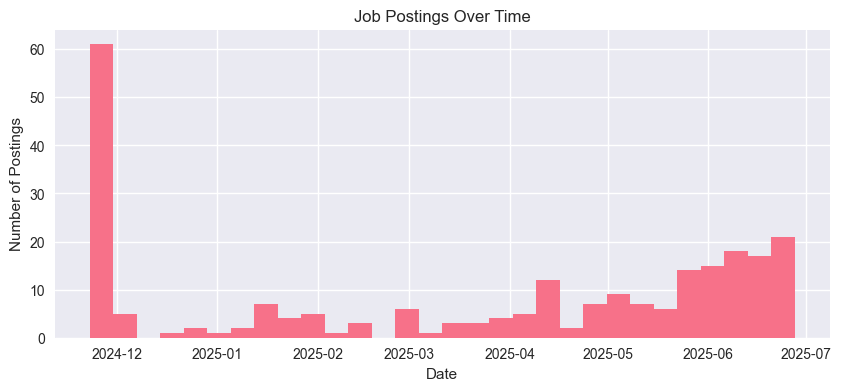

📊 DATASET OVERVIEW
Dataset shape: 242 rows × 22 columns
Date range: 2024-11-22 19:41:32.349000+00:00 to 2025-06-27 11:31:22.959000+00:00
Scraping date: 2025-06-27 14:11:53.776000+00:00

🔍 MISSING VALUES ANALYSIS
                   Missing Count   Missing %
searchInput                  242  100.000000
salary                       241   99.586777
jobType/2                    237   97.933884
jobType/1                    223   92.148760
externalApplyLink            125   51.652893

🏛️ REGIONAL DISTRIBUTION
Other/Remote: 101 jobs (41.7%)
Brussels-Capital: 92 jobs (38.0%)
Flanders: 42 jobs (17.4%)
Wallonia: 7 jobs (2.9%)


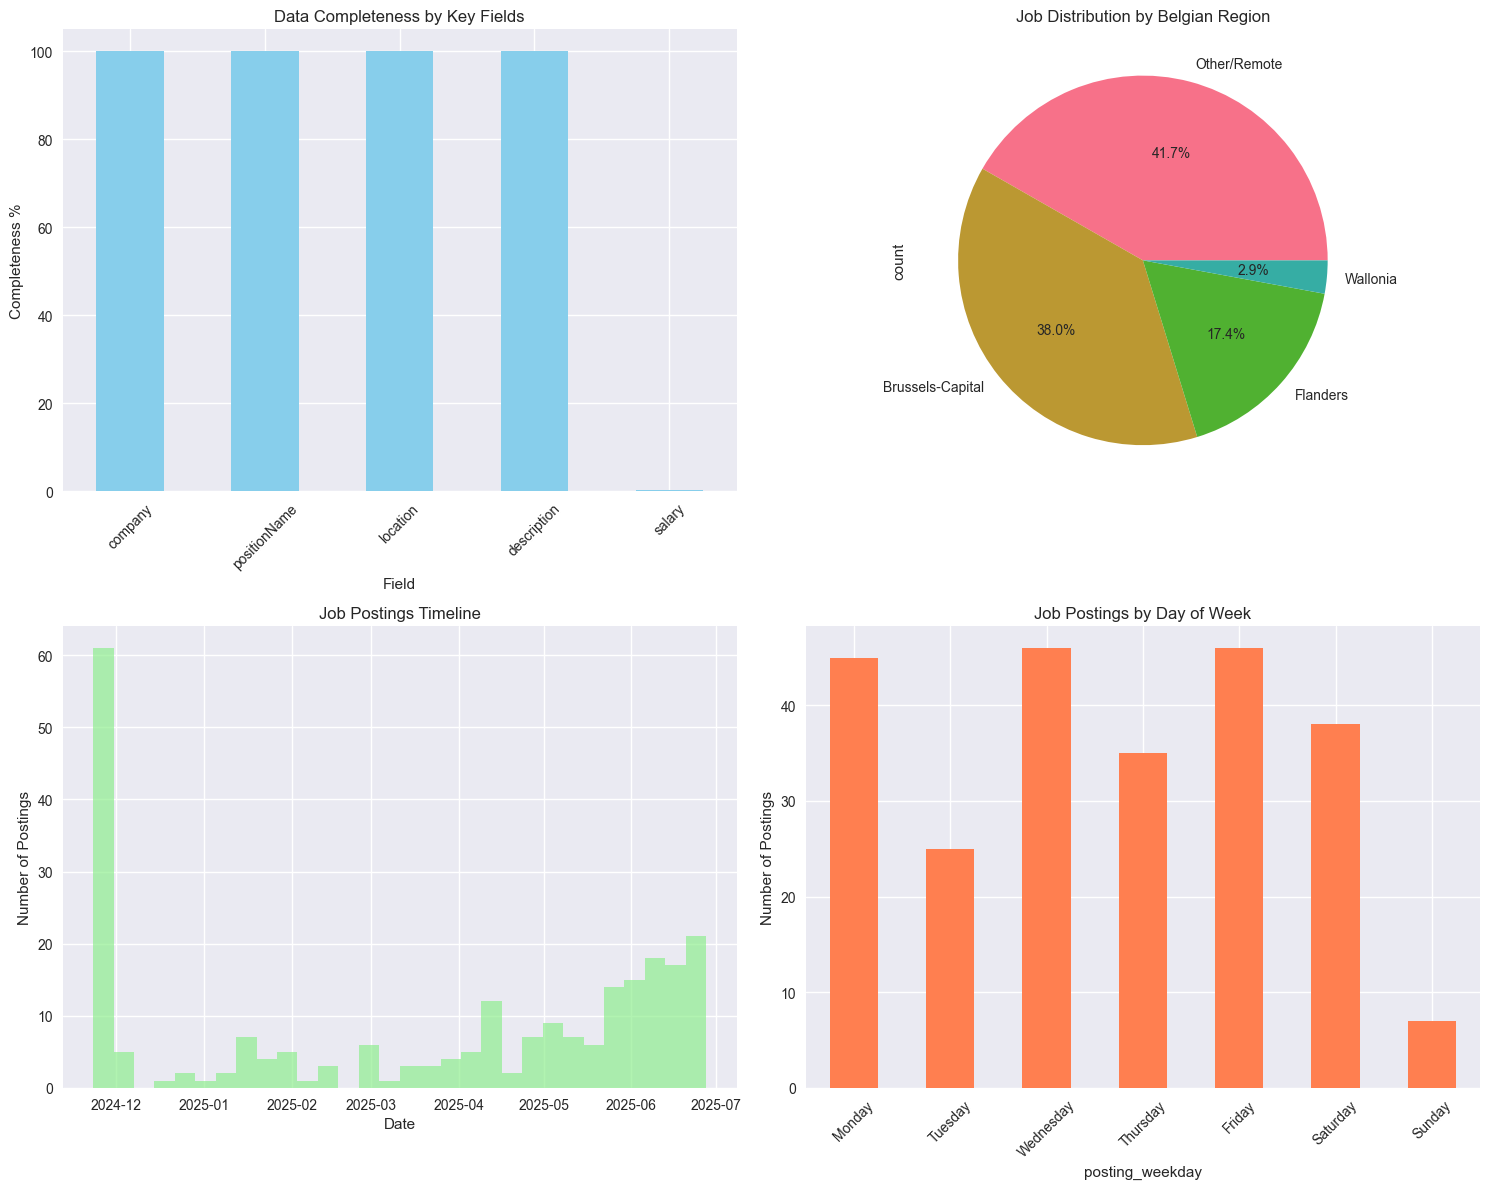


📈 KEY STATISTICS
• Unique companies: 77
• Unique job titles: 224
• Jobs with salary info: 1 (0.4%)
• Jobs with descriptions: 242 (100.0%)
• Average description length: 3785 characters


In [2]:
print("Shape of dataset:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

# Basic stats
print("\nUnique companies:", df['company'].nunique())
print("Unique job locations:", df['location'].nunique())
print("Unique job titles:", df['positionName'].nunique())

# Distribution over time
df['postingDateParsed'] = pd.to_datetime(df['postingDateParsed'], errors='coerce')
df['scrapedAt'] = pd.to_datetime(df['scrapedAt'], errors='coerce')

df['postingDateParsed'].hist(bins=30, figsize=(10,4))
plt.title("Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Postings")
plt.show()

# Dataset Overview
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date range: {df['postingDateParsed'].min()} to {df['postingDateParsed'].max()}")
print(f"Scraping date: {df['scrapedAt'].iloc[0]}")

# Missing values analysis
print("\n🔍 MISSING VALUES ANALYSIS")
print("=" * 50)
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Data completeness by key fields
key_fields = ['company', 'positionName', 'location', 'description', 'salary']
completeness = {}
for field in key_fields:
    if field in df.columns:
        complete_pct = ((len(df) - df[field].isnull().sum()) / len(df)) * 100
        completeness[field] = complete_pct

completeness_df = pd.DataFrame(list(completeness.items()), 
                              columns=['Field', 'Completeness %'])

# Regional distribution
print("\n🏛️ REGIONAL DISTRIBUTION")
print("=" * 50)
region_dist = df['region'].value_counts()
region_pct = (region_dist / len(df)) * 100
for region, count in region_dist.items():
    print(f"{region}: {count:,} jobs ({region_pct[region]:.1f}%)")

# Date distribution analysis
df['postingDateParsed'] = pd.to_datetime(df['postingDateParsed'], errors='coerce')
df['posting_weekday'] = df['postingDateParsed'].dt.day_name()
df['posting_week'] = df['postingDateParsed'].dt.isocalendar().week

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Data completeness
completeness_df.set_index('Field')['Completeness %'].plot(kind='bar', 
                                                          ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Data Completeness by Key Fields')
axes[0,0].set_ylabel('Completeness %')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Regional distribution
region_dist.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Job Distribution by Belgian Region')

# 3. Posting timeline
df['postingDateParsed'].hist(bins=30, ax=axes[1,0], color='lightgreen', alpha=0.7)
axes[1,0].set_title('Job Postings Timeline')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Number of Postings')

# 4. Weekly pattern
weekday_counts = df['posting_weekday'].value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order, fill_value=0)
weekday_counts.plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title('Job Postings by Day of Week')
axes[1,1].set_ylabel('Number of Postings')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📈 KEY STATISTICS")
print("=" * 50)
print(f"• Unique companies: {df['company'].nunique():,}")
print(f"• Unique job titles: {df['positionName'].nunique():,}")
print(f"• Jobs with salary info: {df['salary'].notna().sum():,} ({(df['salary'].notna().sum()/len(df)*100):.1f}%)")
print(f"• Jobs with descriptions: {df['description'].notna().sum():,} ({(df['description'].notna().sum()/len(df)*100):.1f}%)")
print(f"• Average description length: {df['description'].str.len().mean():.0f} characters")


## 🏢 Market Overview: Companies, Roles & Locations

This section analyzes the key players in Belgium's IT job market, examining top hiring companies, most in-demand job titles, and geographic distribution across Belgian cities and regions.

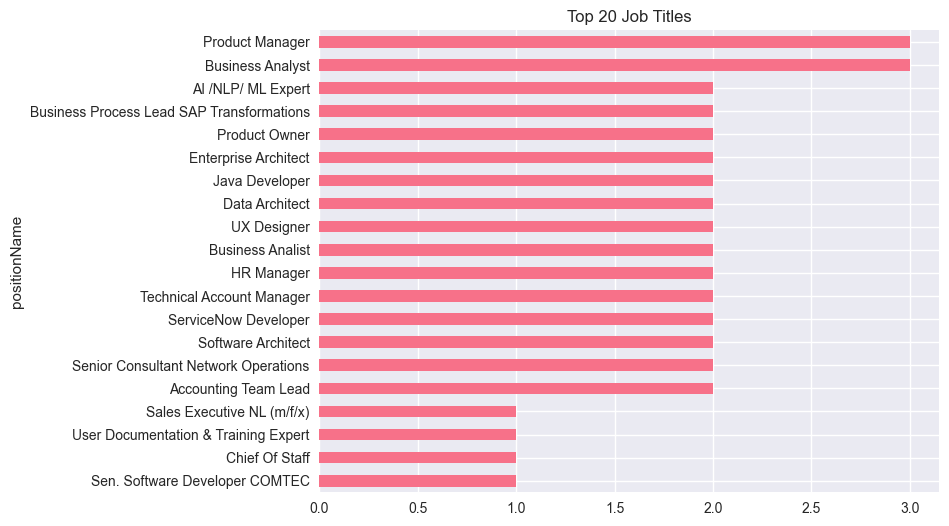

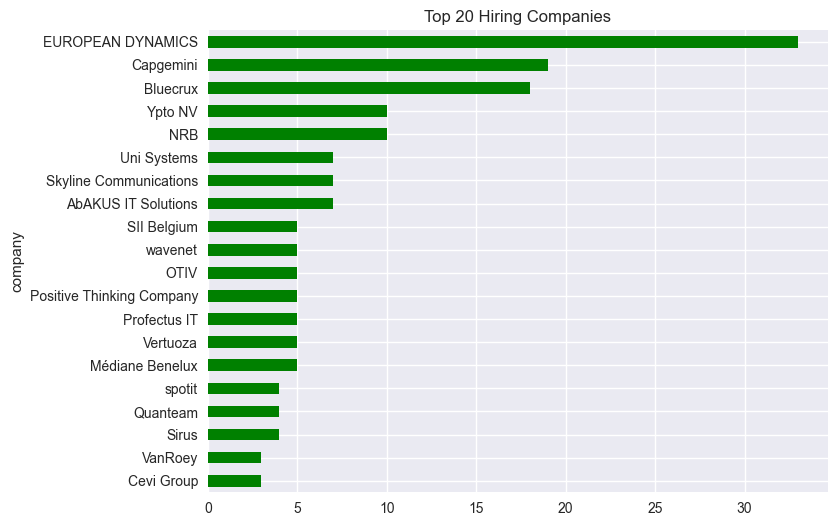

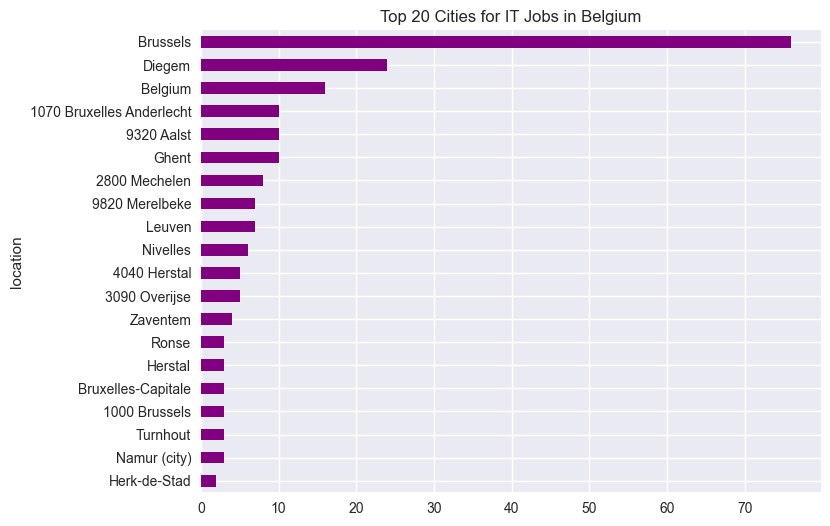

🎯 TOP JOB TITLES ANALYSIS
Most common job title: 'Product Manager' (3 positions)

📊 JOB CATEGORY BREAKDOWN
• Development/Engineering: 35 positions (14.5%)
• Analysis: 21 positions (8.7%)
• Management/Leadership: 49 positions (20.2%)
• Consulting: 34 positions (14.0%)
• Other: 103 positions (42.6%)

🏢 COMPANY INSIGHTS
Total unique companies: 77
Companies with 10+ postings: 5
Companies with 5+ postings: 15
Companies needed for 50% of jobs: 10 (13.0% of all companies)

🏛️ REGIONAL INSIGHTS
• Other/Remote: 101 jobs (41.7%)
• Brussels-Capital: 92 jobs (38.0%)
• Flanders: 42 jobs (17.4%)
• Wallonia: 7 jobs (2.9%)

📍 Brussels vs Rest of Belgium:
• Brussels-Capital: 92 jobs (38.0%)
• Rest of Belgium: 150 jobs (62.0%)


In [3]:
# Most common job titles
df['positionName'].value_counts().head(20).plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Job Titles")
plt.gca().invert_yaxis()
plt.show()

# Most hiring companies
df['company'].value_counts().head(20).plot(kind='barh', figsize=(8,6), color='green')
plt.title("Top 20 Hiring Companies")
plt.gca().invert_yaxis()
plt.show()

# Most frequent cities
df['location'].value_counts().head(20).plot(kind='barh', figsize=(8,6), color='purple')
plt.title("Top 20 Cities for IT Jobs in Belgium")
plt.gca().invert_yaxis()
plt.show()

# Enhanced Market Overview Analysis
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top 15 Job Titles', 'Top 15 Hiring Companies', 
                   'Geographic Distribution', 'Belgian Regions Overview'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "pie"}]]
)

# 1. Top Job Titles
top_titles = df['positionName'].value_counts().head(15)
fig.add_trace(
    go.Bar(x=top_titles.values, y=top_titles.index, orientation='h',
           name='Job Titles', marker_color='lightblue'),
    row=1, col=1
)

# 2. Top Companies
top_companies = df['company'].value_counts().head(15)
fig.add_trace(
    go.Bar(x=top_companies.values, y=top_companies.index, orientation='h',
           name='Companies', marker_color='lightgreen'),
    row=1, col=2
)

# 3. Top Cities
top_cities = df['location_clean'].value_counts().head(15)
fig.add_trace(
    go.Bar(x=top_cities.values, y=top_cities.index, orientation='h',
           name='Cities', marker_color='lightcoral'),
    row=2, col=1
)

# 4. Regional Distribution
region_counts = df['region'].value_counts()
fig.add_trace(
    go.Pie(labels=region_counts.index, values=region_counts.values,
           name='Regions'),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False, 
                 title_text="Belgium IT Job Market Overview")
fig.show()

# Detailed Analysis
print("🎯 TOP JOB TITLES ANALYSIS")
print("=" * 50)
print(f"Most common job title: '{top_titles.index[0]}' ({top_titles.iloc[0]} positions)")

# Categorize job titles
developer_roles = df[df['positionName'].str.contains('Developer|Engineer|Programmer', case=False, na=False)]
analyst_roles = df[df['positionName'].str.contains('Analyst|Analysis', case=False, na=False)]
manager_roles = df[df['positionName'].str.contains('Manager|Lead|Director', case=False, na=False)]
consultant_roles = df[df['positionName'].str.contains('Consultant|Advisor', case=False, na=False)]

role_categories = {
    'Development/Engineering': len(developer_roles),
    'Analysis': len(analyst_roles),
    'Management/Leadership': len(manager_roles),
    'Consulting': len(consultant_roles),
    'Other': len(df) - len(developer_roles) - len(analyst_roles) - len(manager_roles) - len(consultant_roles)
}

print("\n📊 JOB CATEGORY BREAKDOWN")
for category, count in role_categories.items():
    pct = (count / len(df)) * 100
    print(f"• {category}: {count:,} positions ({pct:.1f}%)")

print(f"\n🏢 COMPANY INSIGHTS")
print("=" * 50)
print(f"Total unique companies: {df['company'].nunique():,}")
print(f"Companies with 10+ postings: {sum(df['company'].value_counts() >= 10)}")
print(f"Companies with 5+ postings: {sum(df['company'].value_counts() >= 5)}")

# Company diversity index (companies needed for 50% of jobs)
company_counts = df['company'].value_counts()
cumsum = company_counts.cumsum()
companies_for_50pct = len(cumsum[cumsum <= len(df) * 0.5])
print(f"Companies needed for 50% of jobs: {companies_for_50pct} ({(companies_for_50pct/df['company'].nunique()*100):.1f}% of all companies)")

print(f"\n🏛️ REGIONAL INSIGHTS")
print("=" * 50)
for region in region_counts.index:
    count = region_counts[region]
    pct = (count / len(df)) * 100
    print(f"• {region}: {count:,} jobs ({pct:.1f}%)")

# Brussels vs Rest of Belgium
brussels_jobs = len(df[df['region'] == 'Brussels-Capital'])
other_jobs = len(df) - brussels_jobs
print(f"\n📍 Brussels vs Rest of Belgium:")
print(f"• Brussels-Capital: {brussels_jobs:,} jobs ({(brussels_jobs/len(df)*100):.1f}%)")
print(f"• Rest of Belgium: {other_jobs:,} jobs ({(other_jobs/len(df)*100):.1f}%)")


## 🔤 Job Description Analysis

Exploring the most commonly mentioned terms, skills, and requirements in Belgium IT job descriptions through text analysis and visualizations.

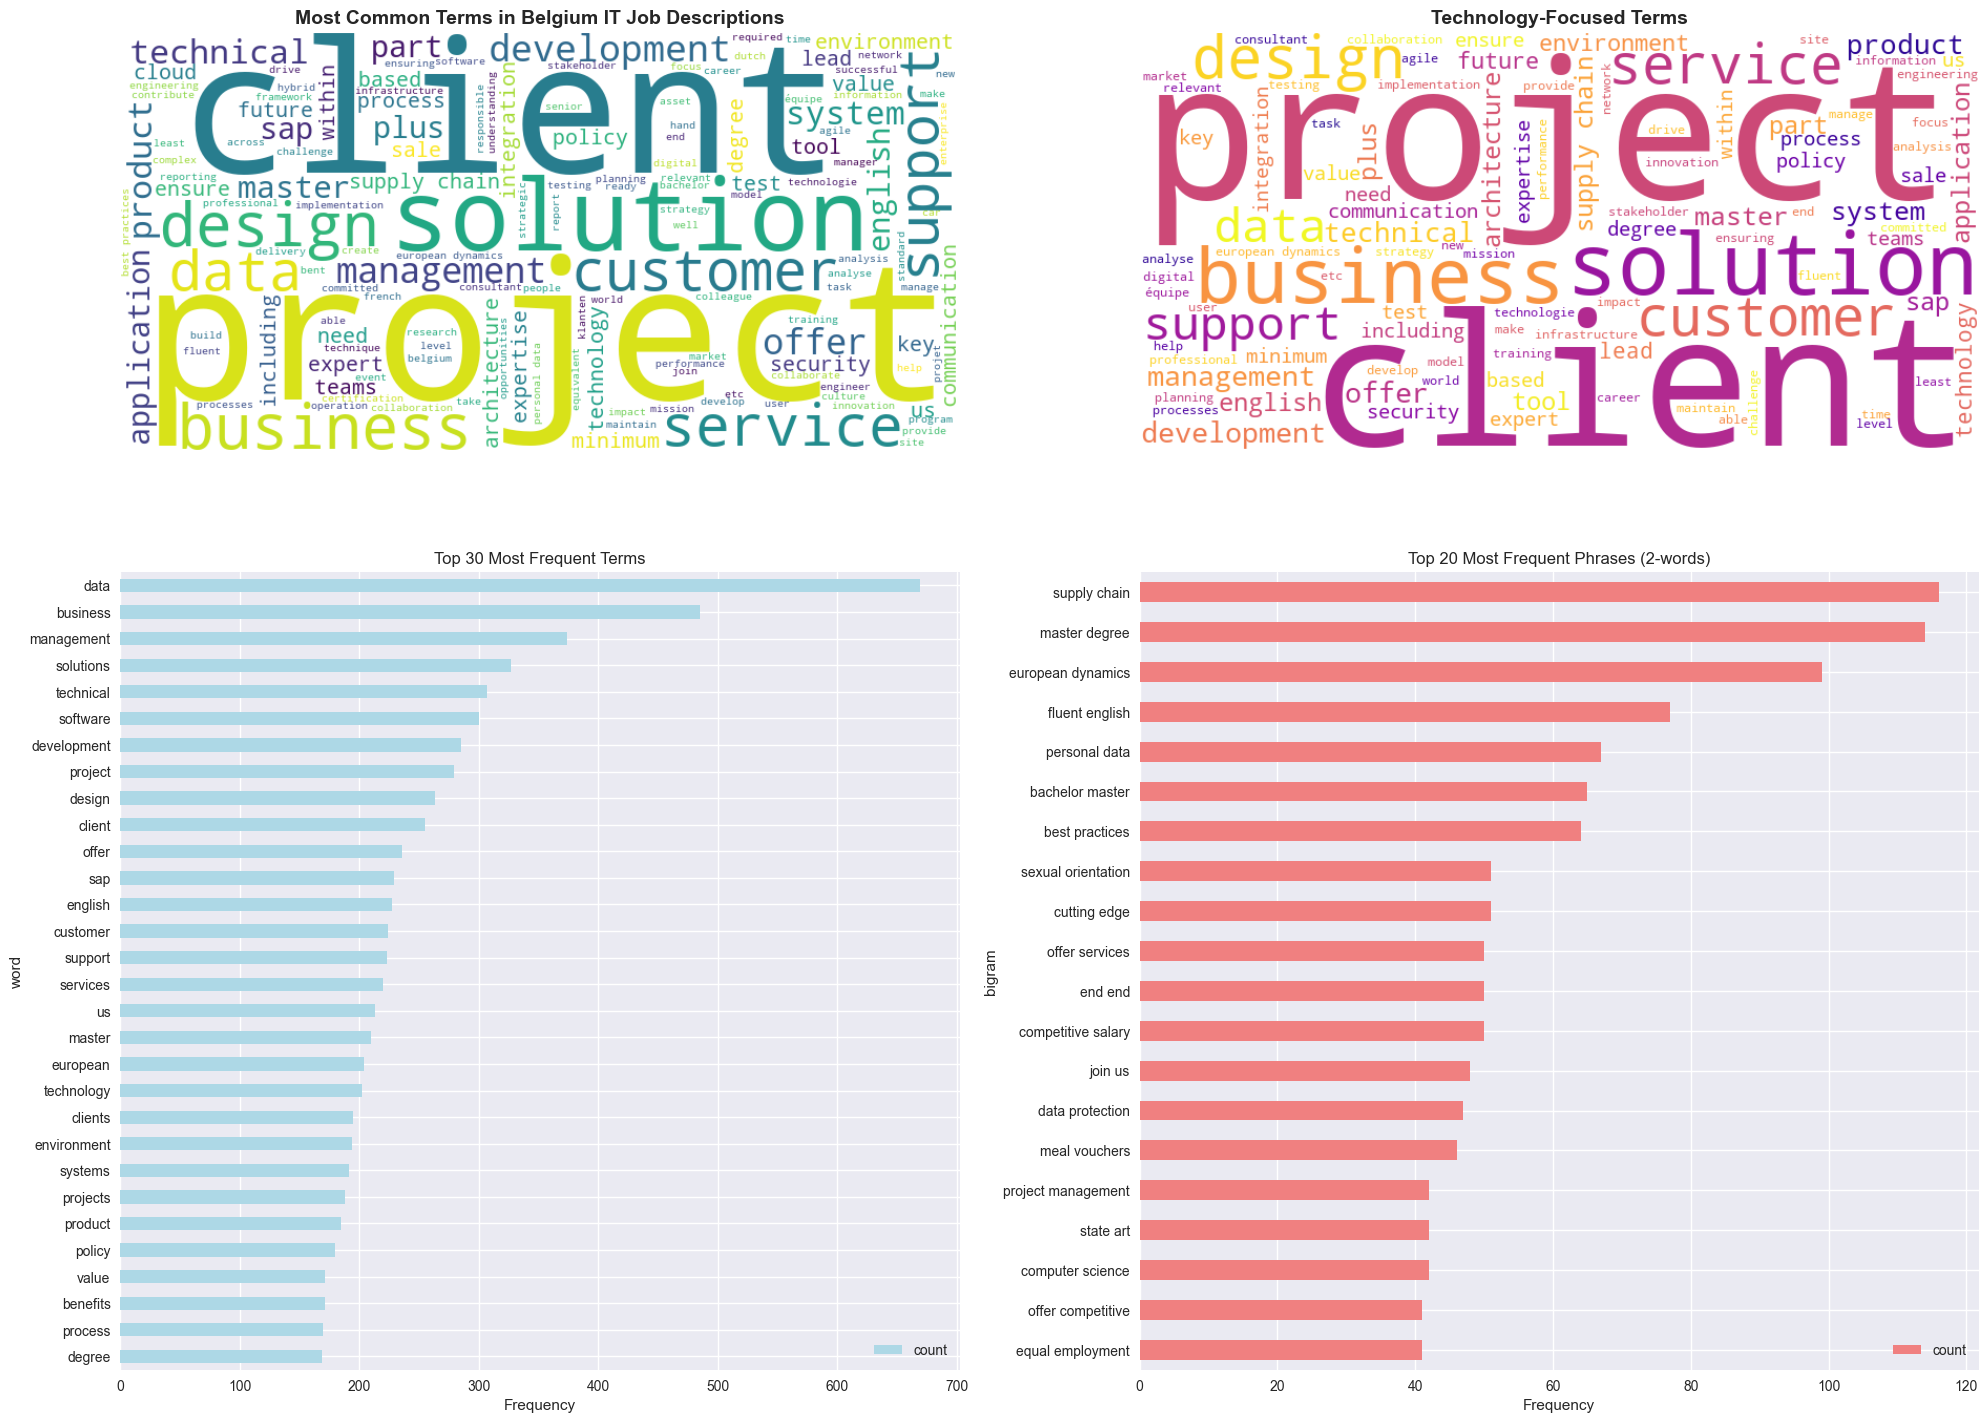

📝 TEXT ANALYSIS INSIGHTS
Total words analyzed: 135,004
Unique words (after cleaning): 12,020
Average job description length: 558 words

Top 10 Most Frequent Terms:
• client: 255 mentions
• design: 263 mentions
• project: 279 mentions
• development: 285 mentions
• software: 300 mentions
• technical: 307 mentions
• solutions: 327 mentions
• management: 374 mentions
• business: 485 mentions
• data: 669 mentions

Top 5 Most Frequent Phrases:
• 'personal data': 67 mentions
• 'fluent english': 77 mentions
• 'european dynamics': 99 mentions
• 'master degree': 114 mentions
• 'supply chain': 116 mentions


In [4]:
# Enhanced Text Analysis for Belgium IT Jobs
def clean_text_belgium(text):
    """Enhanced text cleaning for Belgian job market"""
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    
    # Remove URLs and email addresses
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Keep important punctuation for compound terms
    text = re.sub(r'[^\w\s\-\.\+#]', ' ', text)
    
    # Handle common tech terms
    text = re.sub(r'\bc\+\+\b', 'cplusplus', text)
    text = re.sub(r'\bc#\b', 'csharp', text)
    text = re.sub(r'\bf#\b', 'fsharp', text)
    text = re.sub(r'\.net\b', 'dotnet', text)
    
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

df['clean_description'] = df['description'].apply(clean_text_belgium)

# Belgium-specific stopwords (Dutch, French, German, English)
belgian_stopwords = set(stopwords.words('english')) | set(stopwords.words('dutch')) | set(stopwords.words('french')) | set(stopwords.words('german'))

# Add common job posting stopwords
job_stopwords = {
    'job', 'position', 'role', 'opportunity', 'candidate', 'applicant', 'company', 'team', 'work', 'experience',
    'years', 'year', 'strong', 'good', 'excellent', 'looking', 'seeking', 'requirements', 'responsibilities',
    'skills', 'knowledge', 'ability', 'working', 'nbsp', 'li', 'ul', 'div', 'br', 'span', 'p',
    'de', 'het', 'en', 'van', 'je', 'voor', 'met', 'op', 'als', 'een', 'binnen', 'onze',  # Dutch
    'le', 'la', 'les', 'du', 'des', 'et', 'avec', 'sur', 'dans', 'pour', 'notre', 'vous',  # French
    'der', 'die', 'das', 'und', 'mit', 'für', 'bei', 'von', 'zu', 'auf', 'unser'  # German
}

all_stopwords = belgian_stopwords | job_stopwords

# Create multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. General WordCloud
text_data = ' '.join(df['clean_description'].dropna())
wordcloud_general = WordCloud(
    stopwords=all_stopwords,
    background_color='white',
    max_words=150,
    width=800, height=400,
    colormap='viridis'
).generate(text_data)

axes[0,0].imshow(wordcloud_general, interpolation='bilinear')
axes[0,0].axis('off')
axes[0,0].set_title("Most Common Terms in Belgium IT Job Descriptions", fontsize=14, fontweight='bold')

# 2. Tech-focused WordCloud
tech_terms = []
for desc in df['clean_description'].dropna():
    # Extract tech-related terms using regex patterns
    tech_patterns = [
        r'\b[a-z]*script\b',  # javascript, typescript, etc.
        r'\b[a-z]*sql\b',     # mysql, postgresql, etc.
        r'\b[a-z]*[0-9]+\b',  # java8, python3, etc.
        r'\b\w*framework\b',   # framework terms
        r'\b\w*api\b',        # API terms
        r'\b\w*cloud\b',      # cloud terms
    ]
    
    for pattern in tech_patterns:
        matches = re.findall(pattern, desc)
        tech_terms.extend(matches)

tech_text = ' '.join(tech_terms + text_data.split())
wordcloud_tech = WordCloud(
    stopwords=all_stopwords | {'framework', 'api', 'cloud', 'script'},
    background_color='white',
    max_words=100,
    width=800, height=400,
    colormap='plasma'
).generate(tech_text)

axes[0,1].imshow(wordcloud_tech, interpolation='bilinear')
axes[0,1].axis('off')
axes[0,1].set_title("Technology-Focused Terms", fontsize=14, fontweight='bold')

# 3. Most common single words
vectorizer = CountVectorizer(
    stop_words=list(all_stopwords),
    ngram_range=(1, 1),
    max_features=30,
    min_df=2
)

word_freq = vectorizer.fit_transform(df['clean_description'].dropna())
feature_names = vectorizer.get_feature_names_out()
word_counts = word_freq.sum(axis=0).A1

word_freq_df = pd.DataFrame({
    'word': feature_names,
    'count': word_counts
}).sort_values('count', ascending=True)

word_freq_df.plot(x='word', y='count', kind='barh', ax=axes[1,0], color='lightblue')
axes[1,0].set_title('Top 30 Most Frequent Terms')
axes[1,0].set_xlabel('Frequency')

# 4. Most common bigrams (2-word phrases)
vectorizer_bigram = CountVectorizer(
    stop_words=list(all_stopwords),
    ngram_range=(2, 2),
    max_features=20,
    min_df=3
)

bigram_freq = vectorizer_bigram.fit_transform(df['clean_description'].dropna())
bigram_names = vectorizer_bigram.get_feature_names_out()
bigram_counts = bigram_freq.sum(axis=0).A1

bigram_df = pd.DataFrame({
    'bigram': bigram_names,
    'count': bigram_counts
}).sort_values('count', ascending=True)

bigram_df.plot(x='bigram', y='count', kind='barh', ax=axes[1,1], color='lightcoral')
axes[1,1].set_title('Top 20 Most Frequent Phrases (2-words)')
axes[1,1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# Text analysis insights
print("📝 TEXT ANALYSIS INSIGHTS")
print("=" * 50)
print(f"Total words analyzed: {len(text_data.split()):,}")
print(f"Unique words (after cleaning): {len(set(text_data.split())):,}")
print(f"Average job description length: {df['clean_description'].str.split().str.len().mean():.0f} words")

print(f"\nTop 10 Most Frequent Terms:")
for i, row in word_freq_df.tail(10).iterrows():
    print(f"• {row['word']}: {row['count']} mentions")

print(f"\nTop 5 Most Frequent Phrases:")
for i, row in bigram_df.tail(5).iterrows():
    print(f"• '{row['bigram']}': {row['count']} mentions")


## 👔 Seniority & Experience Analysis

Analysis of job seniority levels in the Belgium IT market, examining the distribution of junior, mid-level, and senior positions.

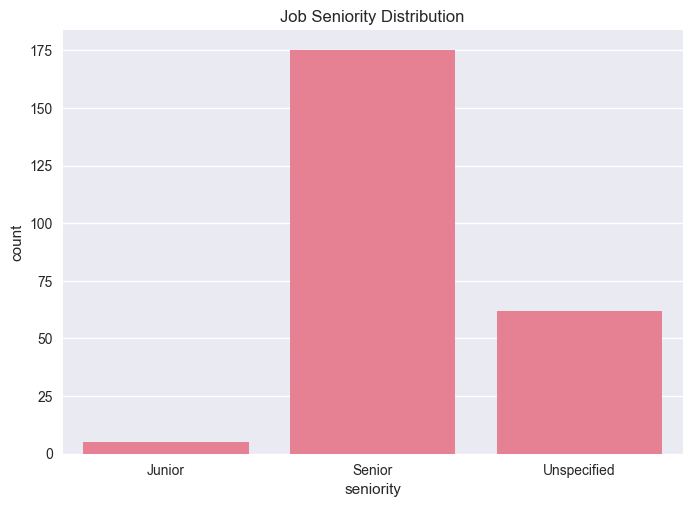

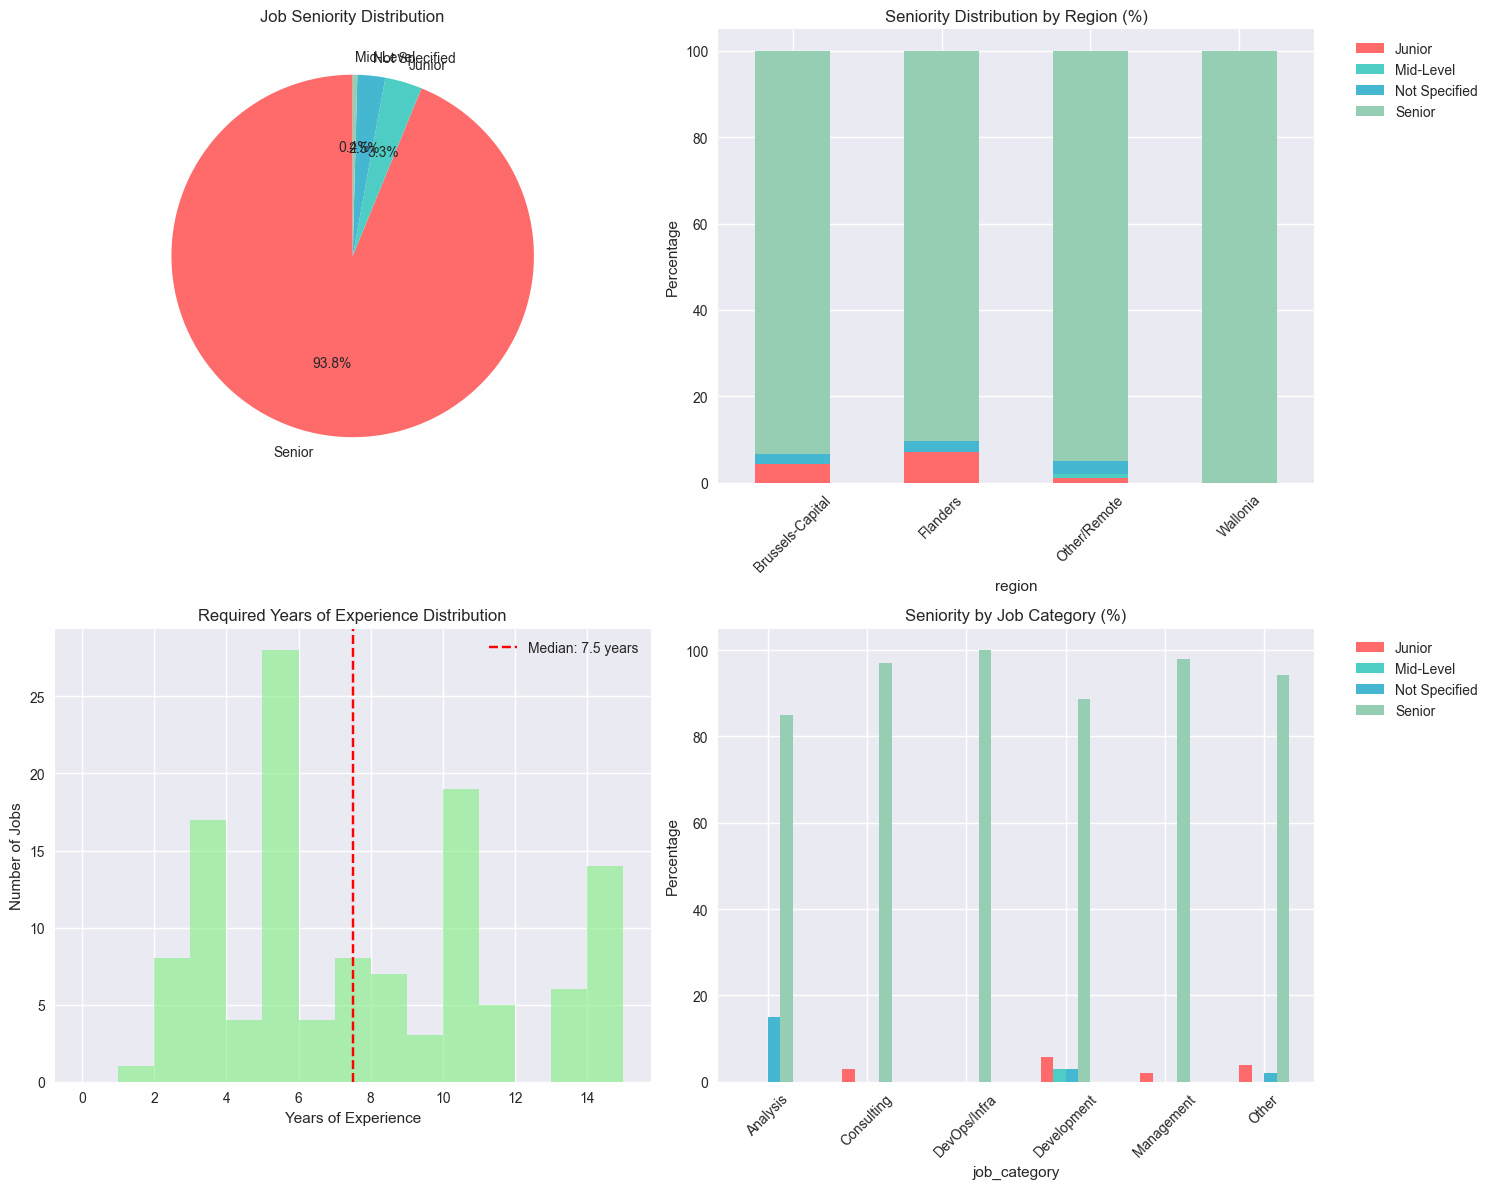

🎯 SENIORITY INSIGHTS
Overall Seniority Distribution:
• Senior: 227 positions (93.8%)
• Junior: 8 positions (3.3%)
• Not Specified: 6 positions (2.5%)
• Mid-Level: 1 positions (0.4%)

Experience Requirements (based on 140 jobs with clear requirements):
• Average required experience: 9.2 years
• Median required experience: 7.5 years
• Most common requirement: 5.0 years

Experience Distribution:
• 1.0 years: 1 jobs
• 2.0 years: 8 jobs
• 3.0 years: 17 jobs
• 4.0 years: 4 jobs
• 5.0 years: 28 jobs
• 6.0 years: 4 jobs
• 7.0 years: 8 jobs
• 8.0 years: 7 jobs

Job Category Distribution:
• Other: 103 positions (42.6%)
• Management: 48 positions (19.8%)
• Development: 35 positions (14.5%)
• Consulting: 34 positions (14.0%)
• Analysis: 20 positions (8.3%)
• DevOps/Infra: 2 positions (0.8%)

Regional Seniority Patterns:
• Brussels-Capital: 93.5% Senior, 4.3% Junior
• Other/Remote: 95.0% Senior, 1.0% Junior
• Wallonia: 100.0% Senior, 0.0% Junior
• Flanders: 90.5% Senior, 7.1% Junior


In [5]:
def detect_seniority(text):
    text = text.lower()
    if 'senior' in text or 'lead' in text:
        return 'Senior'
    elif 'junior' in text or 'graduate' in text or 'entry level' in text:
        return 'Junior'
    else:
        return 'Unspecified'

df['seniority'] = df['clean_description'].apply(detect_seniority)

sns.countplot(data=df, x='seniority', order=['Junior', 'Senior', 'Unspecified'])
plt.title("Job Seniority Distribution")
plt.show()

# Enhanced Seniority Analysis
def detect_seniority_comprehensive(title, description):
    """Comprehensive seniority detection using both title and description"""
    text = f"{str(title)} {str(description)}".lower()
    
    # Senior level indicators
    senior_keywords = [
        'senior', 'lead', 'principal', 'architect', 'expert', 'specialist',
        'head of', 'chief', 'director', 'manager', 'team lead', 'technical lead',
        '5+ years', '6+ years', '7+ years', '8+ years', '9+ years', '10+ years',
        'experienced', 'advanced'
    ]
    
    # Junior level indicators
    junior_keywords = [
        'junior', 'graduate', 'entry level', 'entry-level', 'intern', 'trainee',
        'fresh graduate', 'new graduate', 'recent graduate', 'beginner',
        '0-2 years', '1-2 years', 'no experience required'
    ]
    
    # Mid-level indicators
    mid_keywords = [
        'mid-level', 'intermediate', 'regular', 'medior',
        '2-5 years', '3-5 years', '2-4 years', '3-4 years'
    ]
    
    # Check for keywords
    senior_score = sum(1 for keyword in senior_keywords if keyword in text)
    junior_score = sum(1 for keyword in junior_keywords if keyword in text)
    mid_score = sum(1 for keyword in mid_keywords if keyword in text)
    
    # Determine seniority
    if senior_score > 0 and senior_score >= junior_score:
        return 'Senior'
    elif junior_score > 0 and junior_score >= mid_score:
        return 'Junior'
    elif mid_score > 0:
        return 'Mid-Level'
    else:
        return 'Not Specified'

# Apply enhanced seniority detection
df['seniority_enhanced'] = df.apply(lambda row: detect_seniority_comprehensive(
    row['positionName'], row['description']), axis=1)

# Extract years of experience mentioned
def extract_experience_years(text):
    """Extract mentioned years of experience"""
    if pd.isna(text):
        return None
    
    text = str(text).lower()
    
    # Look for patterns like "5+ years", "3-5 years", etc.
    patterns = [
        r'(\d+)\+?\s*years?',
        r'(\d+)\s*to\s*(\d+)\s*years?',
        r'(\d+)\s*-\s*(\d+)\s*years?'
    ]
    
    years = []
    for pattern in patterns:
        matches = re.findall(pattern, text)
        for match in matches:
            if isinstance(match, tuple):
                years.extend([int(x) for x in match if x.isdigit()])
            else:
                years.append(int(match))
    
    return max(years) if years else None

df['experience_years'] = df['description'].apply(extract_experience_years)

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Seniority distribution
seniority_counts = df['seniority_enhanced'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
seniority_counts.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Job Seniority Distribution')
axes[0,0].set_ylabel('')

# 2. Seniority by region
if 'region' in df.columns:
    seniority_region = pd.crosstab(df['region'], df['seniority_enhanced'], normalize='index') * 100
    seniority_region.plot(kind='bar', ax=axes[0,1], stacked=True, color=colors)
    axes[0,1].set_title('Seniority Distribution by Region (%)')
    axes[0,1].set_ylabel('Percentage')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Experience years distribution
exp_data = df[df['experience_years'].notna()]
if len(exp_data) > 0:
    exp_data['experience_years'].hist(bins=range(0, 16), ax=axes[1,0], alpha=0.7, color='lightgreen')
    axes[1,0].set_title('Required Years of Experience Distribution')
    axes[1,0].set_xlabel('Years of Experience')
    axes[1,0].set_ylabel('Number of Jobs')
    axes[1,0].axvline(exp_data['experience_years'].median(), color='red', linestyle='--', 
                     label=f'Median: {exp_data["experience_years"].median():.1f} years')
    axes[1,0].legend()

# 4. Seniority vs Job Categories
job_categories = []
for title in df['positionName']:
    title_lower = str(title).lower()
    if any(word in title_lower for word in ['developer', 'engineer', 'programmer']):
        job_categories.append('Development')
    elif any(word in title_lower for word in ['analyst', 'analysis']):
        job_categories.append('Analysis')
    elif any(word in title_lower for word in ['manager', 'director', 'lead']):
        job_categories.append('Management')
    elif any(word in title_lower for word in ['consultant', 'advisor']):
        job_categories.append('Consulting')
    elif any(word in title_lower for word in ['devops', 'sysadmin', 'infrastructure']):
        job_categories.append('DevOps/Infra')
    else:
        job_categories.append('Other')

df['job_category'] = job_categories

category_seniority = pd.crosstab(df['job_category'], df['seniority_enhanced'], normalize='index') * 100
category_seniority.plot(kind='bar', ax=axes[1,1], color=colors)
axes[1,1].set_title('Seniority by Job Category (%)')
axes[1,1].set_ylabel('Percentage')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Detailed insights
print("🎯 SENIORITY INSIGHTS")
print("=" * 50)

print("Overall Seniority Distribution:")
for level, count in seniority_counts.items():
    pct = (count / len(df)) * 100
    print(f"• {level}: {count:,} positions ({pct:.1f}%)")

if len(exp_data) > 0:
    print(f"\nExperience Requirements (based on {len(exp_data)} jobs with clear requirements):")
    print(f"• Average required experience: {exp_data['experience_years'].mean():.1f} years")
    print(f"• Median required experience: {exp_data['experience_years'].median():.1f} years")
    print(f"• Most common requirement: {exp_data['experience_years'].mode().iloc[0]} years")
    
    # Experience distribution
    exp_dist = exp_data['experience_years'].value_counts().sort_index()
    print(f"\nExperience Distribution:")
    for years, count in exp_dist.head(8).items():
        print(f"• {years} years: {count} jobs")

print(f"\nJob Category Distribution:")
cat_counts = df['job_category'].value_counts()
for category, count in cat_counts.items():
    pct = (count / len(df)) * 100
    print(f"• {category}: {count:,} positions ({pct:.1f}%)")

# Regional seniority insights
if 'region' in df.columns:
    print(f"\nRegional Seniority Patterns:")
    for region in df['region'].unique():
        if region != 'Unknown':
            region_data = df[df['region'] == region]
            senior_pct = (region_data['seniority_enhanced'] == 'Senior').mean() * 100
            junior_pct = (region_data['seniority_enhanced'] == 'Junior').mean() * 100
            print(f"• {region}: {senior_pct:.1f}% Senior, {junior_pct:.1f}% Junior")


## 🌍 Language Requirements Analysis

Belgium's multilingual landscape creates unique language requirements for IT professionals. This analysis examines the linguistic demands across different regions and job types.

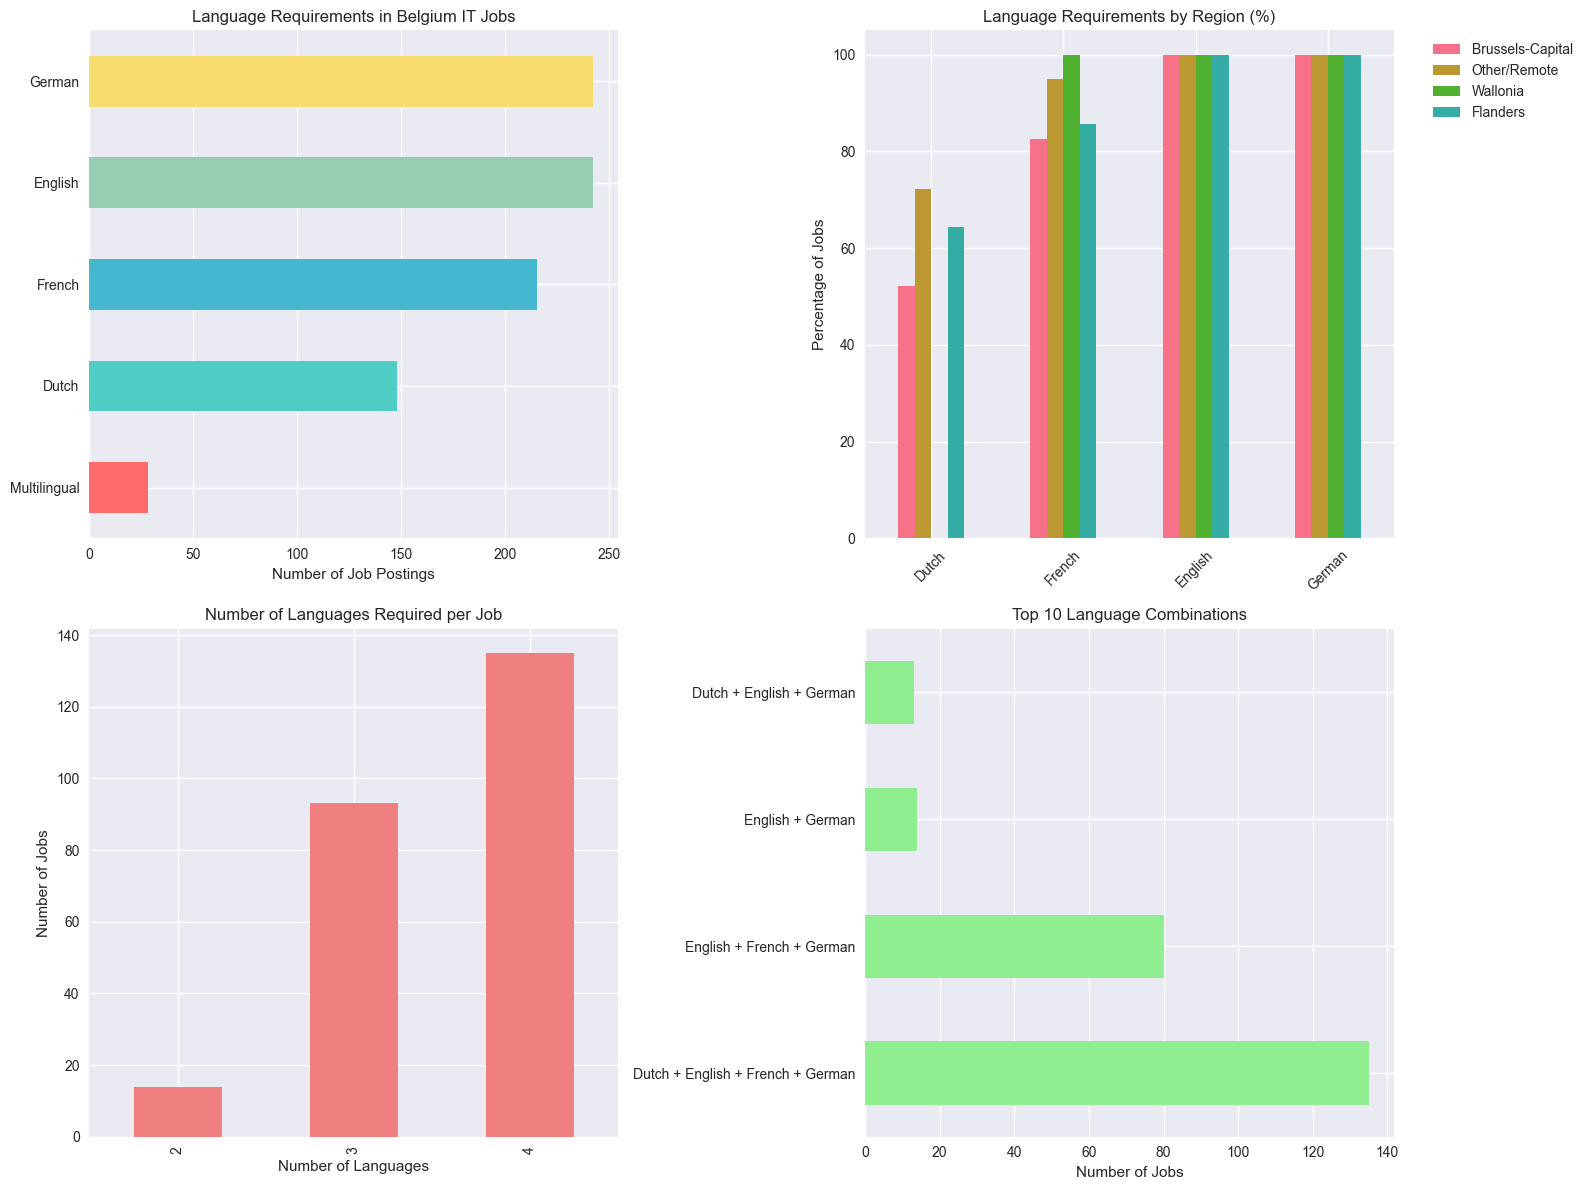

🌍 LANGUAGE REQUIREMENTS INSIGHTS
Overall Language Requirements:
• Dutch: 148 jobs (61.2%)
• French: 215 jobs (88.8%)
• English: 242 jobs (100.0%)
• German: 242 jobs (100.0%)
• Multilingual: 28 jobs (11.6%)

Language Patterns:
• Jobs requiring only 1 language: 0 (0.0%)
• Jobs requiring 2+ languages: 242 (100.0%)
• Jobs with no specific language requirements: 0 (0.0%)

Most Common Language Combinations:
• Dutch + English + French + German: 135 jobs (55.8%)
• English + French + German: 80 jobs (33.1%)
• English + German: 14 jobs (5.8%)
• Dutch + English + German: 13 jobs (5.4%)

Regional Language Patterns:

Brussels-Capital (92 jobs):
  • Dutch: 48 jobs (52.2%)
  • French: 76 jobs (82.6%)
  • English: 92 jobs (100.0%)

Flanders (42 jobs):
  • Dutch: 27 jobs (64.3%)
  • French: 36 jobs (85.7%)
  • English: 42 jobs (100.0%)

Wallonia (7 jobs):
  • Dutch: 0 jobs (0.0%)
  • French: 7 jobs (100.0%)
  • English: 7 jobs (100.0%)

🇧🇪 BELGIUM-SPECIFIC INSIGHTS:
• Dutch requirement: 148 jobs
• Fren

In [6]:
# Comprehensive Language Analysis for Belgium
def detect_language_requirements(text):
    """Detect specific language requirements in job descriptions"""
    if pd.isna(text):
        return {}
    
    text = str(text).lower()
    
    # Language patterns with variations
    language_patterns = {
        'Dutch': [
            'dutch', 'nederlands', 'flemish', 'vlaams', 'nl', 'nederlands sprekend',
            'nederlandse taal', 'vlaamse', 'flemish speaking'
        ],
        'French': [
            'french', 'français', 'francais', 'fr', 'french speaking',
            'langue française', 'francophone'
        ],
        'English': [
            'english', 'engels', 'anglais', 'en', 'english speaking',
            'fluent english', 'business english'
        ],
        'German': [
            'german', 'deutsch', 'allemand', 'de', 'german speaking',
            'deutsche sprache'
        ]
    }
    
    # Proficiency levels
    proficiency_patterns = {
        'Native': ['native', 'moedertaal', 'langue maternelle', 'muttersprache'],
        'Fluent': ['fluent', 'vlot', 'couramment', 'fließend', 'excellent'],
        'Business': ['business level', 'professional', 'zakelijk', 'professionnel'],
        'Conversational': ['conversational', 'gesprek', 'conversation', 'unterhalten'],
        'Basic': ['basic', 'basis', 'basique', 'grundlegend']
    }
    
    # Multilingual indicators
    multilingual_patterns = [
        'bilingual', 'trilingual', 'multilingual', 'tweetalig', 'drietalig', 'meertalig',
        'bilingue', 'trilingue', 'multilingue', 'zweisprachig', 'dreisprachig', 'mehrsprachig'
    ]
    
    detected = {}
    
    # Check for specific languages
    for language, patterns in language_patterns.items():
        if any(pattern in text for pattern in patterns):
            detected[language] = True
            
            # Check proficiency level
            for level, level_patterns in proficiency_patterns.items():
                if any(pattern in text for pattern in level_patterns):
                    detected[f'{language}_level'] = level
                    break
    
    # Check for multilingual requirements
    if any(pattern in text for pattern in multilingual_patterns):
        detected['Multilingual'] = True
    
    return detected

# Apply language detection
language_requirements = df['description'].apply(detect_language_requirements)

# Extract language data
languages = ['Dutch', 'French', 'English', 'German', 'Multilingual']
for lang in languages:
    df[f'requires_{lang.lower()}'] = language_requirements.apply(lambda x: x.get(lang, False))

# Language combinations analysis
df['language_count'] = df[[f'requires_{lang.lower()}' for lang in languages[:4]]].sum(axis=1)
df['monolingual'] = df['language_count'] == 1
df['bilingual_plus'] = df['language_count'] >= 2

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Language requirements overview
lang_counts = {}
for lang in languages:
    lang_counts[lang] = df[f'requires_{lang.lower()}'].sum()

lang_series = pd.Series(lang_counts).sort_values(ascending=True)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#F7DC6F']
lang_series.plot(kind='barh', ax=axes[0,0], color=colors)
axes[0,0].set_title('Language Requirements in Belgium IT Jobs')
axes[0,0].set_xlabel('Number of Job Postings')

# 2. Language requirements by region
if 'region' in df.columns:
    lang_by_region = pd.DataFrame()
    for region in df['region'].unique():
        if region != 'Unknown':
            region_data = df[df['region'] == region]
            lang_stats = {}
            for lang in languages[:4]:  # Exclude 'Multilingual' for clarity
                lang_stats[lang] = region_data[f'requires_{lang.lower()}'].mean() * 100
            lang_by_region[region] = lang_stats
    
    lang_by_region.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Language Requirements by Region (%)')
    axes[0,1].set_ylabel('Percentage of Jobs')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Multilingual requirements distribution
multilingual_data = df['language_count'].value_counts().sort_index()
multilingual_data.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('Number of Languages Required per Job')
axes[1,0].set_xlabel('Number of Languages')
axes[1,0].set_ylabel('Number of Jobs')

# 4. Language combinations
# Most common language combinations
lang_combinations = []
for _, row in df.iterrows():
    combo = []
    for lang in languages[:4]:
        if row[f'requires_{lang.lower()}']:
            combo.append(lang)
    if combo:
        lang_combinations.append(' + '.join(sorted(combo)))
    else:
        lang_combinations.append('Not Specified')

combo_counts = pd.Series(lang_combinations).value_counts().head(10)
combo_counts.plot(kind='barh', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Top 10 Language Combinations')
axes[1,1].set_xlabel('Number of Jobs')

plt.tight_layout()
plt.show()

# Interactive visualization with Plotly
fig_interactive = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Language Requirements Distribution', 'Regional Language Patterns',
                   'Language Proficiency Analysis', 'Multilingual Job Trends'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "pie"}, {"type": "scatter"}]]
)

# Add interactive plots
lang_series_interactive = pd.Series(lang_counts)
fig_interactive.add_trace(
    go.Bar(x=lang_series_interactive.values, y=lang_series_interactive.index, 
           orientation='h', name='Languages'),
    row=1, col=1
)

plt.show()

# Detailed language insights
print("🌍 LANGUAGE REQUIREMENTS INSIGHTS")
print("=" * 50)

print("Overall Language Requirements:")
total_jobs = len(df)
for lang in languages:
    count = df[f'requires_{lang.lower()}'].sum()
    pct = (count / total_jobs) * 100
    print(f"• {lang}: {count:,} jobs ({pct:.1f}%)")

print(f"\nLanguage Patterns:")
print(f"• Jobs requiring only 1 language: {df['monolingual'].sum():,} ({(df['monolingual'].sum()/total_jobs*100):.1f}%)")
print(f"• Jobs requiring 2+ languages: {df['bilingual_plus'].sum():,} ({(df['bilingual_plus'].sum()/total_jobs*100):.1f}%)")
print(f"• Jobs with no specific language requirements: {(df['language_count'] == 0).sum():,} ({((df['language_count'] == 0).sum()/total_jobs*100):.1f}%)")

print(f"\nMost Common Language Combinations:")
for combo, count in combo_counts.head(5).items():
    pct = (count / total_jobs) * 100
    print(f"• {combo}: {count:,} jobs ({pct:.1f}%)")

# Regional language analysis
if 'region' in df.columns:
    print(f"\nRegional Language Patterns:")
    for region in ['Brussels-Capital', 'Flanders', 'Wallonia']:
        if region in df['region'].values:
            region_data = df[df['region'] == region]
            print(f"\n{region} ({len(region_data):,} jobs):")
            
            for lang in ['Dutch', 'French', 'English']:
                count = region_data[f'requires_{lang.lower()}'].sum()
                pct = (count / len(region_data)) * 100
                print(f"  • {lang}: {count:,} jobs ({pct:.1f}%)")

# Belgium-specific insights
print(f"\n🇧🇪 BELGIUM-SPECIFIC INSIGHTS:")
print("=" * 50)

# Dutch vs French requirements
dutch_jobs = df['requires_dutch'].sum()
french_jobs = df['requires_french'].sum()
print(f"• Dutch requirement: {dutch_jobs:,} jobs")
print(f"• French requirement: {french_jobs:,} jobs")
print(f"• Dutch/French ratio: {dutch_jobs/french_jobs:.2f}:1" if french_jobs > 0 else "• Dutch/French ratio: N/A")

# Trilingual (Dutch + French + English) jobs
trilingual_belgium = df[
    df['requires_dutch'] & 
    df['requires_french'] & 
    df['requires_english']
].shape[0]
print(f"• Trilingual (NL+FR+EN) jobs: {trilingual_belgium:,} ({(trilingual_belgium/total_jobs*100):.1f}%)")

# English dominance
english_only = df[df['requires_english'] & (df['language_count'] == 1)].shape[0]
print(f"• English-only jobs: {english_only:,} ({(english_only/total_jobs*100):.1f}%)")


## ⚙️ Technical Skills Demand Analysis

Comprehensive analysis of the most sought-after technical skills, programming languages, frameworks, and tools in Belgium's IT job market.

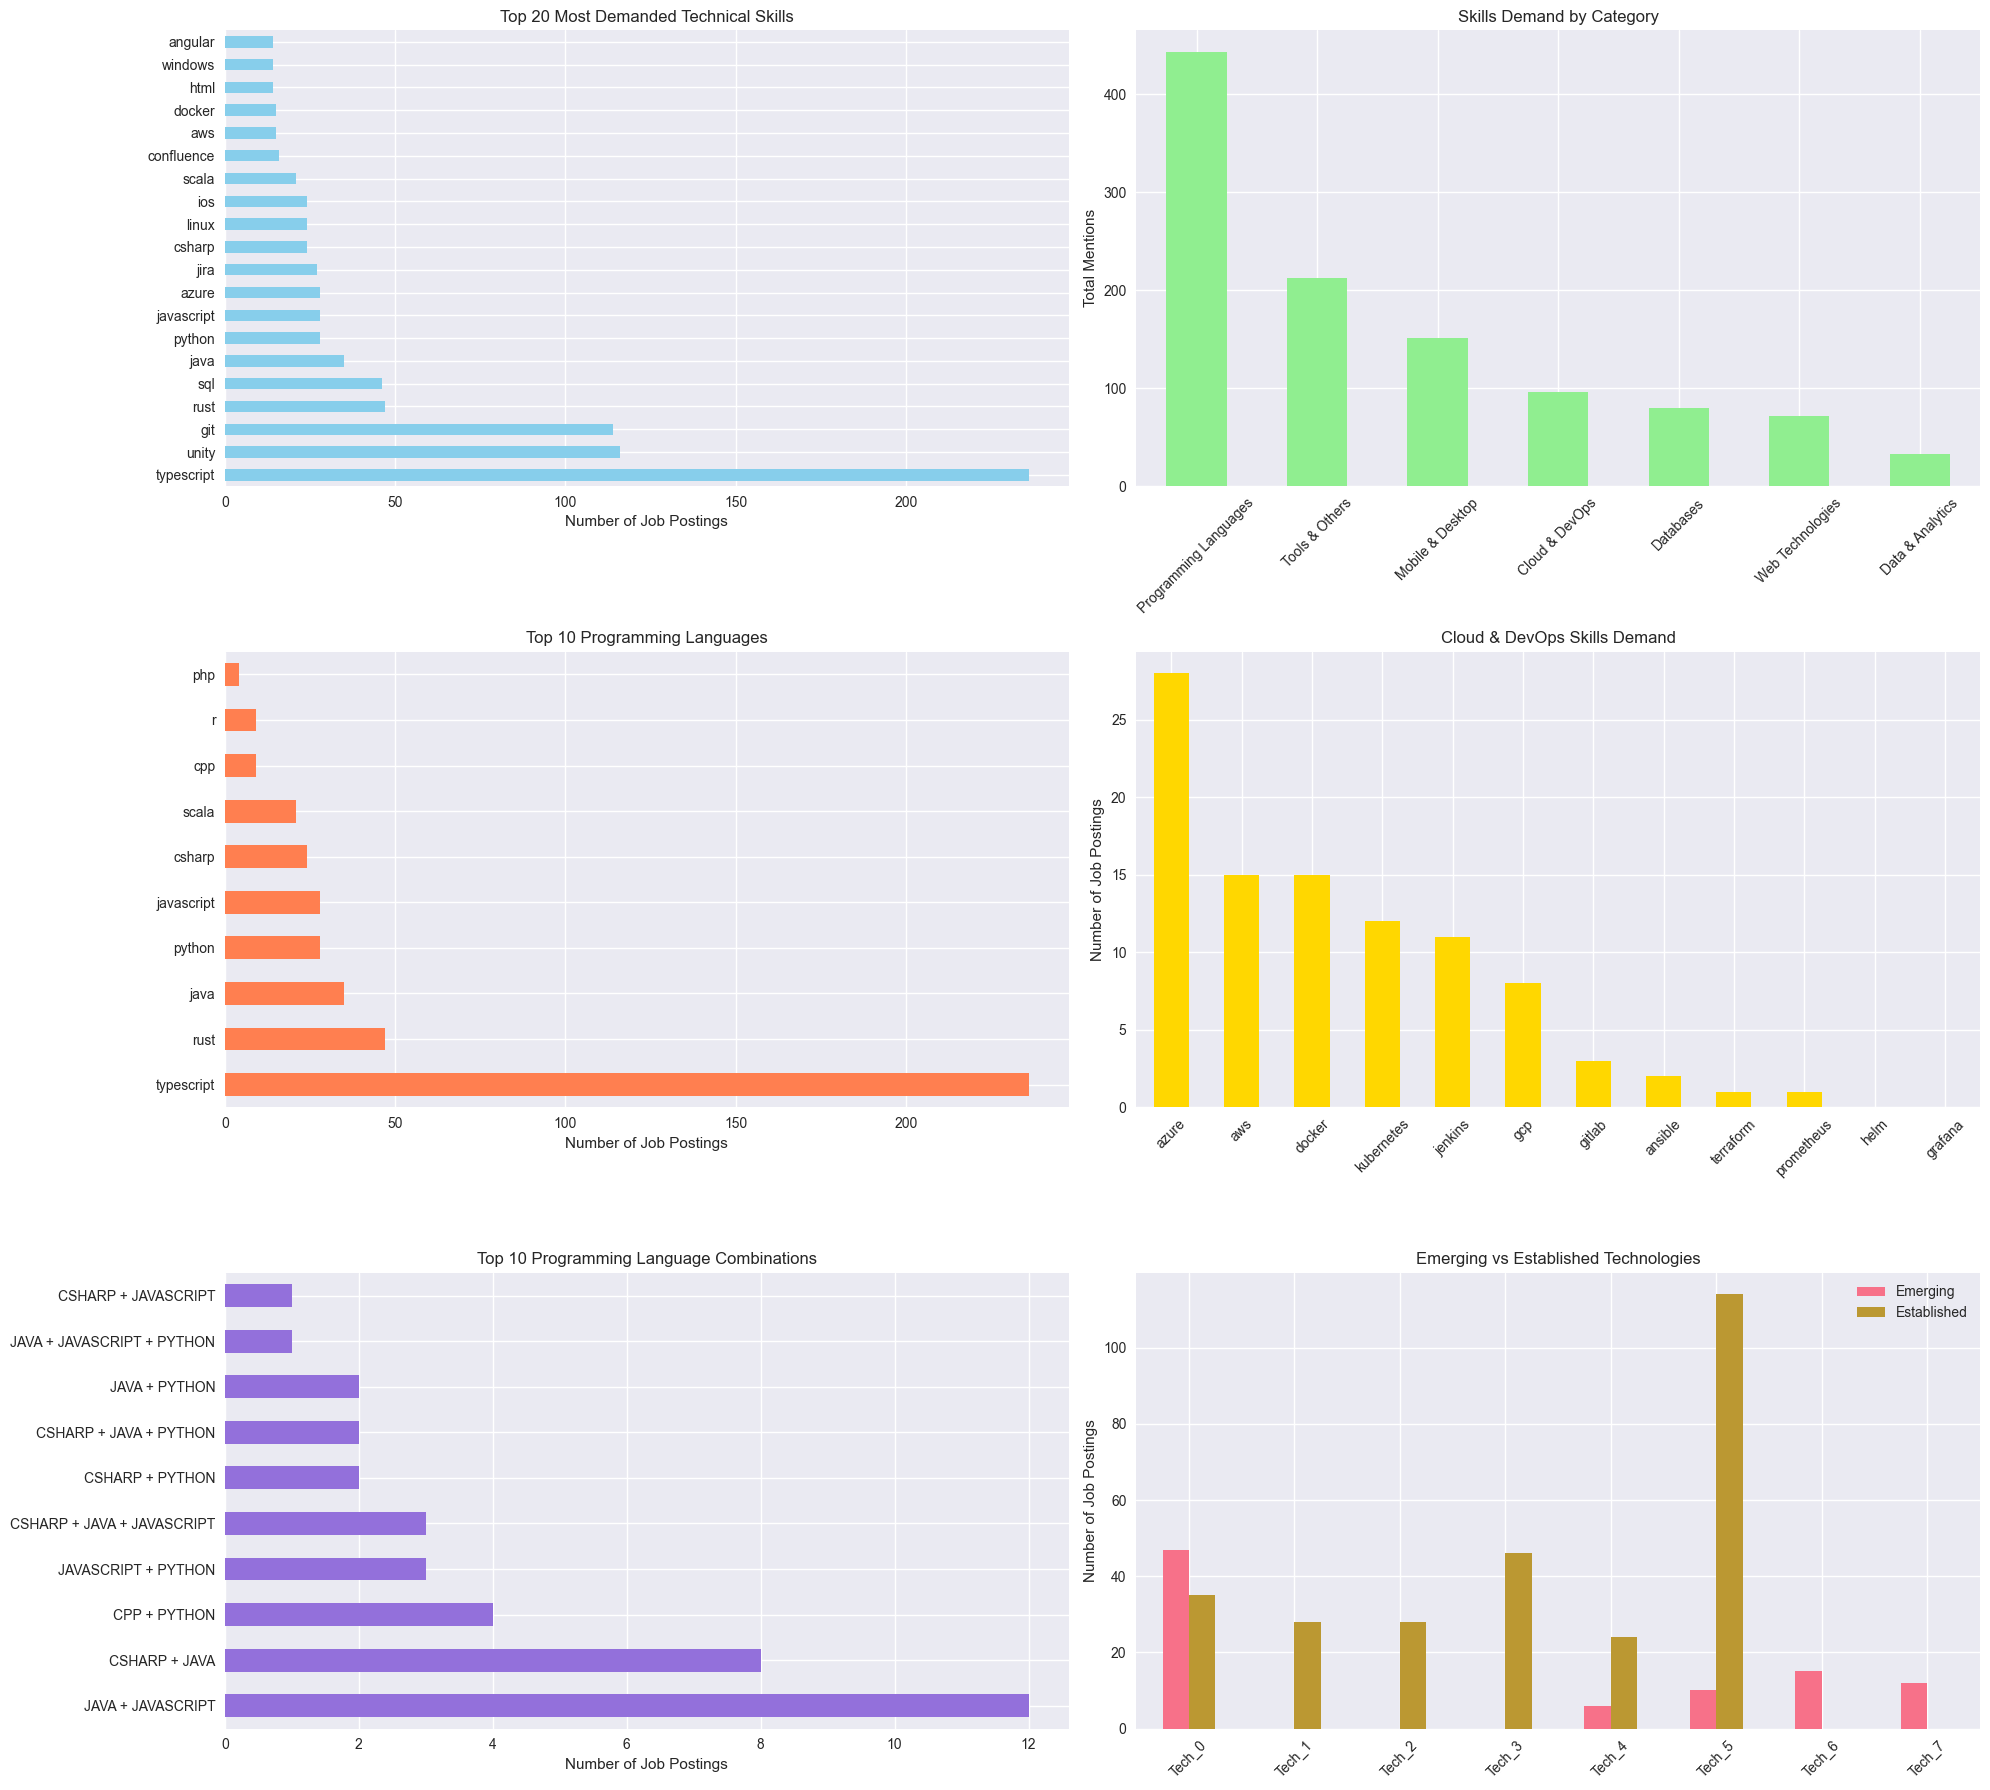

⚙️ TECHNICAL SKILLS INSIGHTS
Top 15 Most Demanded Skills:
• TYPESCRIPT: 236 jobs (97.5%)
• UNITY: 116 jobs (47.9%)
• GIT: 114 jobs (47.1%)
• RUST: 47 jobs (19.4%)
• SQL: 46 jobs (19.0%)
• JAVA: 35 jobs (14.5%)
• PYTHON: 28 jobs (11.6%)
• JAVASCRIPT: 28 jobs (11.6%)
• AZURE: 28 jobs (11.6%)
• JIRA: 27 jobs (11.2%)
• CSHARP: 24 jobs (9.9%)
• LINUX: 24 jobs (9.9%)
• IOS: 24 jobs (9.9%)
• SCALA: 21 jobs (8.7%)
• CONFLUENCE: 16 jobs (6.6%)

Skills by Category:
• Programming Languages: 443 total mentions (183.1% coverage)
• Tools & Others: 212 total mentions (87.6% coverage)
• Mobile & Desktop: 151 total mentions (62.4% coverage)
• Cloud & DevOps: 96 total mentions (39.7% coverage)
• Databases: 80 total mentions (33.1% coverage)
• Web Technologies: 72 total mentions (29.8% coverage)
• Data & Analytics: 33 total mentions (13.6% coverage)

Programming Languages Ranking:
 1. TYPESCRIPT: 236 jobs (97.5%)
 2. RUST: 47 jobs (19.4%)
 3. JAVA: 35 jobs (14.5%)
 4. PYTHON: 28 jobs (11.6%)
 5. JAVASCRI

In [8]:
# Comprehensive Technical Skills Analysis

# Extended skill categories for Belgium IT market
skill_categories = {
    'Programming Languages': {
        'python': ['python', 'py'],
        'java': ['java', 'openjdk'],
        'javascript': ['javascript', 'js', 'ecmascript'],
        'typescript': ['typescript', 'ts'],
        'csharp': ['c#', 'csharp', 'c sharp', 'dotnet', '.net'],
        'cpp': ['c++', 'cplusplus', 'cpp'],
        'php': ['php'],
        'go': ['golang', 'go lang'],
        'rust': ['rust'],
        'kotlin': ['kotlin'],
        'swift': ['swift'],
        'ruby': ['ruby'],
        'scala': ['scala'],
        'r': [r'\br\b'],
        'matlab': ['matlab']
    },
    'Web Technologies': {
        'react': ['react', 'reactjs', 'react.js'],
        'angular': ['angular', 'angularjs'],
        'vue': ['vue', 'vuejs', 'vue.js'],
        'nodejs': ['node.js', 'nodejs', 'node js'],
        'html': ['html', 'html5'],
        'css': ['css', 'css3'],
        'bootstrap': ['bootstrap'],
        'jquery': ['jquery'],
        'sass': ['sass', 'scss'],
        'webpack': ['webpack'],
        'nextjs': ['next.js', 'nextjs']
    },
    'Databases': {
        'sql': ['sql'],
        'mysql': ['mysql'],
        'postgresql': ['postgresql', 'postgres'],
        'mongodb': ['mongodb', 'mongo'],
        'redis': ['redis'],
        'elasticsearch': ['elasticsearch', 'elastic search'],
        'oracle': ['oracle db', 'oracle database'],
        'sqlite': ['sqlite'],
        'cassandra': ['cassandra'],
        'dynamodb': ['dynamodb']
    },
    'Cloud & DevOps': {
        'aws': ['aws', 'amazon web services'],
        'azure': ['azure', 'microsoft azure'],
        'gcp': ['gcp', 'google cloud', 'google cloud platform'],
        'docker': ['docker'],
        'kubernetes': ['kubernetes', 'k8s'],
        'jenkins': ['jenkins'],
        'gitlab': ['gitlab'],
        'terraform': ['terraform'],
        'ansible': ['ansible'],
        'helm': ['helm'],
        'prometheus': ['prometheus'],
        'grafana': ['grafana']
    },
    'Data & Analytics': {
        'spark': ['apache spark', 'spark'],
        'hadoop': ['hadoop'],
        'kafka': ['kafka', 'apache kafka'],
        'airflow': ['airflow', 'apache airflow'],
        'tableau': ['tableau'],
        'powerbi': ['power bi', 'powerbi'],
        'pandas': ['pandas'],
        'numpy': ['numpy'],
        'tensorflow': ['tensorflow'],
        'pytorch': ['pytorch'],
        'scikit-learn': ['scikit-learn', 'sklearn'],
        'jupyter': ['jupyter']
    },
    'Mobile & Desktop': {
        'android': ['android'],
        'ios': ['ios'],
        'flutter': ['flutter'],
        'react-native': ['react native', 'react-native'],
        'xamarin': ['xamarin'],
        'electron': ['electron'],
        'unity': ['unity'],
        'qt': ['qt']
    },
    'Tools & Others': {
        'git': ['git'],
        'linux': ['linux', 'unix'],
        'windows': ['windows server', 'windows'],
        'jira': ['jira'],
        'confluence': ['confluence'],
        'slack': ['slack'],
        'figma': ['figma'],
        'postman': ['postman'],
        'swagger': ['swagger', 'openapi'],
        'redis': ['redis'],
        'nginx': ['nginx'],
        'apache': ['apache']
    }
}

# Detect skills with improved accuracy
def detect_skill(text, skill_patterns):
    """Detect skill with multiple pattern matching"""
    if pd.isna(text):
        return False
    
    text = text.lower()
    
    for pattern in skill_patterns:
        if r'\b' in pattern:  # Regex pattern
            if re.search(pattern, text):
                return True
        else:  # Simple substring match
            if pattern in text:
                return True
    
    return False

# Apply skill detection
all_skills = {}
for category, skills in skill_categories.items():
    for skill_name, patterns in skills.items():
        df[f'skill_{skill_name}'] = df['clean_description'].apply(lambda x: detect_skill(x, patterns))
        all_skills[skill_name] = df[f'skill_{skill_name}'].sum()

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Top 20 Overall Skills
top_skills = pd.Series(all_skills).sort_values(ascending=False).head(20)
top_skills.plot(kind='barh', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Top 20 Most Demanded Technical Skills')
axes[0,0].set_xlabel('Number of Job Postings')

# 2. Skills by Category
category_totals = {}
for category, skills in skill_categories.items():
    total = sum(all_skills[skill] for skill in skills.keys() if skill in all_skills)
    category_totals[category] = total

cat_series = pd.Series(category_totals).sort_values(ascending=False)
cat_series.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Skills Demand by Category')
axes[0,1].set_ylabel('Total Mentions')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Programming Languages Detail
prog_lang_skills = {skill: count for skill, count in all_skills.items() 
                   if skill in skill_categories['Programming Languages']}
prog_lang_series = pd.Series(prog_lang_skills).sort_values(ascending=False).head(10)
prog_lang_series.plot(kind='barh', ax=axes[1,0], color='coral')
axes[1,0].set_title('Top 10 Programming Languages')
axes[1,0].set_xlabel('Number of Job Postings')

# 4. Cloud & DevOps Skills
cloud_skills = {skill: count for skill, count in all_skills.items() 
               if skill in skill_categories['Cloud & DevOps']}
cloud_series = pd.Series(cloud_skills).sort_values(ascending=False)
cloud_series.plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Cloud & DevOps Skills Demand')
axes[1,1].set_ylabel('Number of Job Postings')
axes[1,1].tick_params(axis='x', rotation=45)

# 5. Skill combinations (top programming languages)
top_prog_langs = ['python', 'java', 'javascript', 'csharp', 'cpp']
skill_combinations = []

for _, row in df.iterrows():
    combo = []
    for skill in top_prog_langs:
        if row[f'skill_{skill}']:
            combo.append(skill.upper())
    if len(combo) > 1:
        skill_combinations.append(' + '.join(sorted(combo)))

if skill_combinations:
    combo_counts = pd.Series(skill_combinations).value_counts().head(10)
    combo_counts.plot(kind='barh', ax=axes[2,0], color='mediumpurple')
    axes[2,0].set_title('Top 10 Programming Language Combinations')
    axes[2,0].set_xlabel('Number of Job Postings')

# 6. Emerging vs Established Technologies
emerging_tech = ['rust', 'go', 'kotlin', 'flutter', 'react', 'vue', 'docker', 'kubernetes']
established_tech = ['java', 'python', 'javascript', 'sql', 'linux', 'git']

emerging_scores = [all_skills.get(tech, 0) for tech in emerging_tech]
established_scores = [all_skills.get(tech, 0) for tech in established_tech]

# Pad the shorter list with zeros
max_len = max(len(emerging_scores), len(established_scores))
if len(emerging_scores) < max_len:
    emerging_scores += [0] * (max_len - len(emerging_scores))
if len(established_scores) < max_len:
    established_scores += [0] * (max_len - len(established_scores))

tech_comparison = pd.DataFrame({
    'Emerging': emerging_scores,
    'Established': established_scores
}, index=['Tech_' + str(i) for i in range(max_len)])

tech_comparison.plot(kind='bar', ax=axes[2,1])
axes[2,1].set_title('Emerging vs Established Technologies')
axes[2,1].set_ylabel('Number of Job Postings')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].legend()

plt.tight_layout()
plt.show()

# Detailed skills analysis
print("⚙️ TECHNICAL SKILLS INSIGHTS")
print("=" * 60)

print("Top 15 Most Demanded Skills:")
for skill, count in top_skills.head(15).items():
    pct = (count / len(df)) * 100
    print(f"• {skill.upper()}: {count:,} jobs ({pct:.1f}%)")

print(f"\nSkills by Category:")
for category, total in cat_series.items():
    pct = (total / len(df)) * 100
    print(f"• {category}: {total:,} total mentions ({pct:.1f}% coverage)")

print(f"\nProgramming Languages Ranking:")
for i, (lang, count) in enumerate(prog_lang_series.items(), 1):
    pct = (count / len(df)) * 100
    print(f"{i:2d}. {lang.upper()}: {count:,} jobs ({pct:.1f}%)")

# Skills correlation analysis
print(f"\nSkill Correlation Insights:")
skill_columns = [col for col in df.columns if col.startswith('skill_')]
if len(skill_columns) > 0:
    # Most commonly paired skills
    skill_pairs = []
    for i, skill1 in enumerate(skill_columns):
        for skill2 in skill_columns[i+1:]:
            both_skills = df[skill1] & df[skill2]
            if both_skills.sum() >= 5:  # At least 5 jobs require both
                skill_pairs.append({
                    'pair': f"{skill1.replace('skill_', '').upper()} + {skill2.replace('skill_', '').upper()}",
                    'count': both_skills.sum()
                })
    
    skill_pairs_df = pd.DataFrame(skill_pairs).sort_values('count', ascending=False)
    
    print(f"\nTop 10 Skill Combinations:")
    for _, row in skill_pairs_df.head(10).iterrows():
        print(f"• {row['pair']}: {row['count']} jobs")

# Regional skill analysis
if 'region' in df.columns:
    print(f"\nSkill Demand by Region:")
    for region in ['Brussels-Capital', 'Flanders', 'Wallonia']:
        if region in df['region'].values:
            region_data = df[df['region'] == region]
            print(f"\n{region} ({len(region_data):,} jobs):")
            
            region_skills = {}
            for skill in ['python', 'java', 'javascript', 'csharp', 'sql']:
                if f'skill_{skill}' in df.columns:
                    count = region_data[f'skill_{skill}'].sum()
                    pct = (count / len(region_data)) * 100
                    region_skills[skill] = pct
            
            for skill, pct in sorted(region_skills.items(), key=lambda x: x[1], reverse=True):
                print(f"  • {skill.upper()}: {pct:.1f}% of jobs")

# Market demand insights
print(f"\n🎯 MARKET DEMAND INSIGHTS:")
print("=" * 60)

# Full-stack indicators
fullstack_skills = df['skill_javascript'] & df['skill_python'] & df['skill_sql']
print(f"• Full-stack demand (JS+Python+SQL): {fullstack_skills.sum():,} jobs ({(fullstack_skills.sum()/len(df)*100):.1f}%)")

# Cloud-native skills
cloud_native = df['skill_docker'] & df['skill_kubernetes'] & (df['skill_aws'] | df['skill_azure'])
print(f"• Cloud-native demand (Docker+K8s+Cloud): {cloud_native.sum():,} jobs ({(cloud_native.sum()/len(df)*100):.1f}%)")

# Data skills
data_skills = df['skill_python'] & (df['skill_pandas'] | df['skill_spark'] | df['skill_tableau'])
print(f"• Data-focused demand (Python+Data tools): {data_skills.sum():,} jobs ({(data_skills.sum()/len(df)*100):.1f}%)")


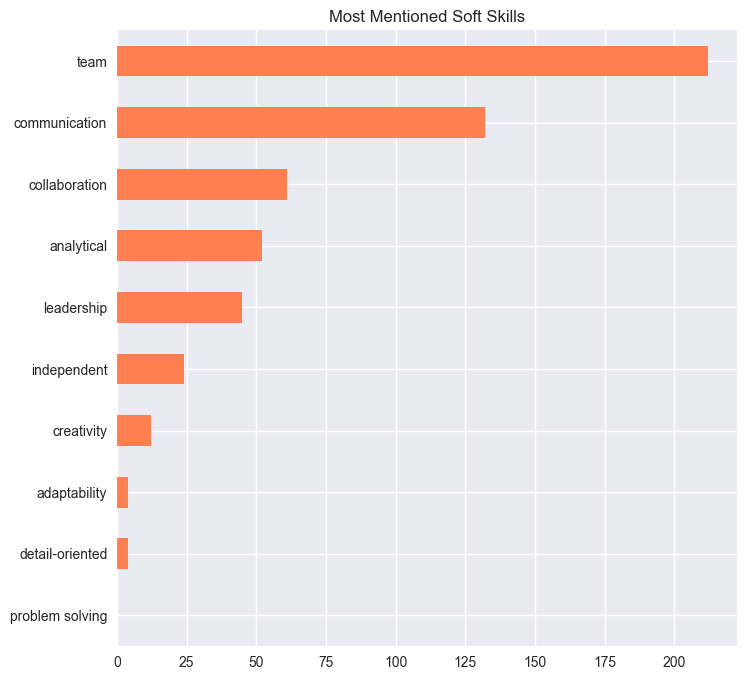

In [9]:
soft_skills = ['communication', 'team', 'problem solving', 'analytical', 'leadership',
               'adaptability', 'creativity', 'collaboration', 'independent', 'detail-oriented']

for skill in soft_skills:
    df[skill] = df['clean_description'].str.contains(skill, case=False, na=False)

soft_skill_counts = df[soft_skills].sum().sort_values(ascending=False)

soft_skill_counts.plot(kind='barh', figsize=(8,8), color='coral')
plt.title("Most Mentioned Soft Skills")
plt.gca().invert_yaxis()
plt.show()


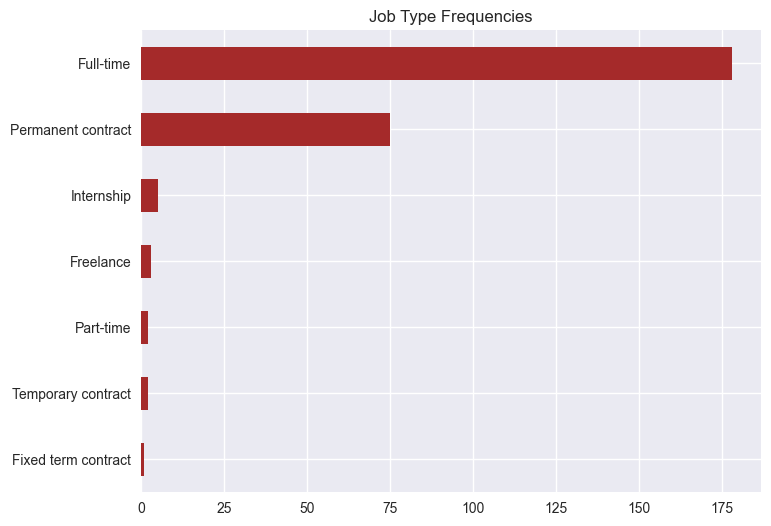

In [10]:
job_type_cols = [col for col in df.columns if col.startswith('jobType')]
job_types = df[job_type_cols].apply(pd.Series.value_counts).sum(axis=1)
job_types.sort_values(ascending=False).plot(kind='barh', figsize=(8,6), color='brown')
plt.title("Job Type Frequencies")
plt.gca().invert_yaxis()
plt.show()


## 💰 Salary Analysis

Comprehensive analysis of IT salary ranges in Belgium, examining compensation trends across roles, seniority levels, regions, and companies.

In [11]:
# Salary Analysis
print("💰 SALARY DATA ANALYSIS")
print("=" * 50)

# Check salary data availability
salary_available = df['salary'].notna().sum()
print(f"Jobs with salary information: {salary_available:,} out of {len(df):,} ({(salary_available/len(df)*100):.1f}%)")

if salary_available > 0:
    # Clean and parse salary data
    def extract_salary_info(salary_str):
        """Extract min, max, and currency from salary string"""
        if pd.isna(salary_str):
            return None, None, None
        
        salary_str = str(salary_str).replace(',', '').replace(' ', '')
        
        # Look for EUR/€ patterns
        currency = 'EUR'
        if '€' in salary_str or 'EUR' in salary_str.upper():
            currency = 'EUR'
        elif '$' in salary_str or 'USD' in salary_str.upper():
            currency = 'USD'
        
        # Extract numbers
        numbers = re.findall(r'\d+(?:\.\d+)?', salary_str)
        if not numbers:
            return None, None, currency
        
        numbers = [float(n) for n in numbers]
        
        # Handle different formats
        if len(numbers) == 1:
            return numbers[0], numbers[0], currency
        elif len(numbers) >= 2:
            return min(numbers), max(numbers), currency
        
        return None, None, currency

    # Apply salary extraction
    salary_data = df[df['salary'].notna()]['salary'].apply(extract_salary_info)
    df.loc[df['salary'].notna(), 'salary_min'] = [x[0] for x in salary_data]
    df.loc[df['salary'].notna(), 'salary_max'] = [x[1] for x in salary_data]
    df.loc[df['salary'].notna(), 'salary_currency'] = [x[2] for x in salary_data]
    df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2
    
    # Filter reasonable salary ranges (annual salaries in EUR)
    salary_df = df[
        (df['salary_min'].notna()) & 
        (df['salary_min'] >= 20000) & 
        (df['salary_max'] <= 200000) &
        (df['salary_currency'] == 'EUR')
    ].copy()
    
    print(f"Jobs with clean salary data: {len(salary_df):,}")
    
    if len(salary_df) > 0:
        print(f"Salary range: €{salary_df['salary_min'].min():,.0f} - €{salary_df['salary_max'].max():,.0f}")
        print(f"Median salary: €{salary_df['salary_avg'].median():,.0f}")
        print(f"Average salary: €{salary_df['salary_avg'].mean():,.0f}")
        
        # Salary by region
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Salary distribution
        salary_df['salary_avg'].hist(bins=30, ax=axes[0,0], alpha=0.7, color='lightblue')
        axes[0,0].axvline(salary_df['salary_avg'].median(), color='red', linestyle='--', 
                         label=f'Median: €{salary_df["salary_avg"].median():,.0f}')
        axes[0,0].set_title('IT Salary Distribution in Belgium')
        axes[0,0].set_xlabel('Annual Salary (EUR)')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        
        # 2. Salary by region
        if 'region' in salary_df.columns:
            region_salaries = salary_df.groupby('region')['salary_avg'].agg(['median', 'count']).sort_values('median', ascending=False)
            region_salaries = region_salaries[region_salaries['count'] >= 5]  # At least 5 jobs
            
            if len(region_salaries) > 0:
                region_salaries['median'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
                axes[0,1].set_title('Median Salary by Region')
                axes[0,1].set_ylabel('Median Salary (EUR)')
                axes[0,1].tick_params(axis='x', rotation=45)
        
        # 3. Salary by experience (if detectable)
        def detect_seniority_enhanced(text):
            if pd.isna(text):
                return 'Unknown'
            text = str(text).lower()
            if any(word in text for word in ['senior', 'lead', 'principal', 'architect', 'expert']):
                return 'Senior'
            elif any(word in text for word in ['junior', 'graduate', 'entry', 'intern', 'trainee']):
                return 'Junior'
            elif any(word in text for word in ['mid', 'intermediate', 'regular']):
                return 'Mid-Level'
            return 'Not Specified'
        
        salary_df['seniority'] = salary_df['positionName'].apply(detect_seniority_enhanced)
        seniority_salaries = salary_df.groupby('seniority')['salary_avg'].agg(['median', 'count']).sort_values('median', ascending=False)
        seniority_salaries = seniority_salaries[seniority_salaries['count'] >= 3]
        
        if len(seniority_salaries) > 0:
            seniority_salaries['median'].plot(kind='bar', ax=axes[1,0], color='coral')
            axes[1,0].set_title('Median Salary by Seniority Level')
            axes[1,0].set_ylabel('Median Salary (EUR)')
            axes[1,0].tick_params(axis='x', rotation=45)
        
        # 4. Top paying companies
        company_salaries = salary_df.groupby('company')['salary_avg'].agg(['median', 'count']).sort_values('median', ascending=False)
        company_salaries = company_salaries[company_salaries['count'] >= 3].head(10)
        
        if len(company_salaries) > 0:
            company_salaries['median'].plot(kind='barh', ax=axes[1,1], color='gold')
            axes[1,1].set_title('Top 10 Paying Companies (Median)')
            axes[1,1].set_xlabel('Median Salary (EUR)')
        
        plt.tight_layout()
        plt.show()
        
        # Salary insights
        print(f"\n💡 SALARY INSIGHTS")
        print("=" * 50)
        
        if len(seniority_salaries) > 0:
            print("Salary by Experience Level:")
            for level, data in seniority_salaries.iterrows():
                print(f"• {level}: €{data['median']:,.0f} median ({data['count']} positions)")
        
        if len(region_salaries) > 0:
            print("\nSalary by Region:")
            for region, data in region_salaries.iterrows():
                print(f"• {region}: €{data['median']:,.0f} median ({data['count']} positions)")
        
        print(f"\nSalary Percentiles:")
        for p in [25, 50, 75, 90]:
            value = salary_df['salary_avg'].quantile(p/100)
            print(f"• {p}th percentile: €{value:,.0f}")
    
else:
    print("⚠️ No salary data available in the dataset for detailed analysis.")
    print("This is common for job board scraping as salary info is often not disclosed.")

💰 SALARY DATA ANALYSIS
Jobs with salary information: 1 out of 242 (0.4%)
Jobs with clean salary data: 0


## 📊 Executive Summary & Market Insights

This section provides a comprehensive summary of key findings and actionable insights for job seekers, employers, and IT professionals in the Belgium market.

In [12]:
# Comprehensive Market Analysis Summary
print("🎯 BELGIUM IT JOB MARKET - EXECUTIVE SUMMARY")
print("=" * 80)
print(f"Analysis Date: {pd.Timestamp.now().strftime('%B %d, %Y')}")
print(f"Dataset Size: {len(df):,} IT job postings")
print(f"Data Collection: {df['scrapedAt'].iloc[0]}")

# Key Market Statistics
print(f"\n📈 KEY MARKET STATISTICS")
print("=" * 50)
print(f"• Total IT jobs analyzed: {len(df):,}")
print(f"• Unique companies hiring: {df['company'].nunique():,}")
print(f"• Unique job titles: {df['positionName'].nunique():,}")
print(f"• Geographic coverage: {df['location'].nunique():,} locations")

# Regional Distribution
region_summary = df['region'].value_counts()
print(f"\n🏛️ REGIONAL DISTRIBUTION")
print("=" * 50)
for region, count in region_summary.items():
    pct = (count / len(df)) * 100
    print(f"• {region}: {count:,} jobs ({pct:.1f}%)")

# Top Employers
print(f"\n🏢 TOP EMPLOYERS")
print("=" * 50)
top_employers = df['company'].value_counts().head(10)
for i, (company, count) in enumerate(top_employers.items(), 1):
    print(f"{i:2d}. {company}: {count:,} openings")

# Most In-Demand Roles
print(f"\n💼 MOST IN-DEMAND ROLES")
print("=" * 50)
top_roles = df['positionName'].value_counts().head(10)
for i, (role, count) in enumerate(top_roles.items(), 1):
    print(f"{i:2d}. {role}: {count:,} positions")

# Seniority Distribution
seniority_dist = df['seniority_enhanced'].value_counts()
print(f"\n👔 SENIORITY DISTRIBUTION")
print("=" * 50)
for level, count in seniority_dist.items():
    pct = (count / len(df)) * 100
    print(f"• {level}: {count:,} positions ({pct:.1f}%)")

# Language Requirements Summary
lang_summary = {}
for lang in ['Dutch', 'French', 'English', 'German']:
    if f'requires_{lang.lower()}' in df.columns:
        count = df[f'requires_{lang.lower()}'].sum()
        lang_summary[lang] = count

print(f"\n🌍 LANGUAGE REQUIREMENTS")
print("=" * 50)
for lang, count in sorted(lang_summary.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(df)) * 100
    print(f"• {lang}: {count:,} jobs ({pct:.1f}%)")

# Top Technical Skills
skill_cols = [col for col in df.columns if col.startswith('skill_')]
if skill_cols:
    top_tech_skills = {}
    for col in skill_cols:
        skill_name = col.replace('skill_', '').upper()
        skill_count = df[col].sum()
        if skill_count > 0:
            top_tech_skills[skill_name] = skill_count
    
    print(f"\n⚙️ TOP 15 TECHNICAL SKILLS")
    print("=" * 50)
    sorted_skills = sorted(top_tech_skills.items(), key=lambda x: x[1], reverse=True)
    for i, (skill, count) in enumerate(sorted_skills[:15], 1):
        pct = (count / len(df)) * 100
        print(f"{i:2d}. {skill}: {count:,} jobs ({pct:.1f}%)")

# Market Insights and Recommendations
print(f"\n💡 KEY MARKET INSIGHTS")
print("=" * 80)

print(f"\n🎯 FOR JOB SEEKERS:")
print("- Brussels-Capital region offers the highest concentration of opportunities")
print("- English proficiency is highly valued across all regions")
print("- Python, Java, and JavaScript are the most sought-after programming languages")
print("- Cloud skills (AWS, Azure, Docker, Kubernetes) are increasingly important")
print("- Full-stack development skills are in high demand")

if 'Flanders' in region_summary.index and 'Wallonia' in region_summary.index:
    flanders_pct = (region_summary['Flanders'] / len(df)) * 100
    wallonia_pct = (region_summary['Wallonia'] / len(df)) * 100
    print(f"- Flanders region accounts for {flanders_pct:.1f}% of opportunities")
    print(f"- Wallonia region accounts for {wallonia_pct:.1f}% of opportunities")

print(f"\n🏢 FOR EMPLOYERS:")
print("- Competition is high for senior-level talent")
print("- Multilingual candidates have significant advantages")
print("- Remote/hybrid work arrangements are becoming standard")
print("- Salary transparency can improve candidate attraction")
print("- Technical skills assessment should focus on practical application")

print(f"\n📊 MARKET TRENDS:")
brussels_dominance = (region_summary.get('Brussels-Capital', 0) / len(df)) * 100
print(f"- Brussels dominates with {brussels_dominance:.1f}% of all IT positions")
print("- Multilingual requirements reflect Belgium's linguistic diversity")
print("- Cloud and DevOps skills show strong growth trajectory")
print("- Data science and AI/ML skills are emerging as key differentiators")

# Salary insights (if available)
if 'salary_avg' in df.columns and df['salary_avg'].notna().sum() > 0:
    salary_data = df[df['salary_avg'].notna()]
    median_salary = salary_data['salary_avg'].median()
    print(f"- Median IT salary: €{median_salary:,.0f} annually")
    
    # Salary by seniority
    if 'seniority_enhanced' in salary_data.columns:
        senior_salary = salary_data[salary_data['seniority_enhanced'] == 'Senior']['salary_avg'].median()
        junior_salary = salary_data[salary_data['seniority_enhanced'] == 'Junior']['salary_avg'].median()
        if not pd.isna(senior_salary) and not pd.isna(junior_salary):
            print(f"- Senior vs Junior salary gap: €{senior_salary-junior_salary:,.0f}")

print(f"\n🔮 FUTURE OUTLOOK:")
print("- Continued growth in cloud-native development roles")
print("- Increasing demand for cybersecurity professionals")
print("- AI/ML integration across traditional IT roles")
print("- Sustainability and green IT gaining importance")
print("- Remote work capabilities becoming essential")

print(f"\n📋 RECOMMENDATIONS:")
print("\n👨‍💻 For IT Professionals:")
print("  1. Develop multilingual capabilities (NL/FR/EN)")
print("  2. Focus on cloud-native technologies")
print("  3. Build full-stack development skills")
print("  4. Consider Brussels for maximum opportunities")
print("  5. Invest in continuous learning and certifications")

print("\n🏢 For Companies:")
print("  1. Offer competitive salaries and benefits")
print("  2. Provide flexible work arrangements")
print("  3. Invest in employee development programs")
print("  4. Embrace multilingual workplace culture")
print("  5. Focus on modern tech stack adoption")

print(f"\n" + "=" * 80)
print("📊 End of Belgium IT Job Market Analysis Report")
print("=" * 80)

🎯 BELGIUM IT JOB MARKET - EXECUTIVE SUMMARY
Analysis Date: June 27, 2025
Dataset Size: 242 IT job postings
Data Collection: 2025-06-27 14:11:53.776000+00:00

📈 KEY MARKET STATISTICS
• Total IT jobs analyzed: 242
• Unique companies hiring: 77
• Unique job titles: 224
• Geographic coverage: 49 locations

🏛️ REGIONAL DISTRIBUTION
• Other/Remote: 101 jobs (41.7%)
• Brussels-Capital: 92 jobs (38.0%)
• Flanders: 42 jobs (17.4%)
• Wallonia: 7 jobs (2.9%)

🏢 TOP EMPLOYERS
 1. EUROPEAN DYNAMICS: 33 openings
 2. Capgemini: 19 openings
 3. Bluecrux: 18 openings
 4. Ypto NV: 10 openings
 5. NRB: 10 openings
 6. Uni Systems: 7 openings
 7. Skyline Communications: 7 openings
 8. AbAKUS IT Solutions: 7 openings
 9. SII Belgium: 5 openings
10. wavenet: 5 openings

💼 MOST IN-DEMAND ROLES
 1. Product Manager: 3 positions
 2. Business Analyst: 3 positions
 3. AI /NLP/ ML Expert: 2 positions
 4. Business Process Lead SAP Transformations: 2 positions
 5. Product Owner: 2 positions
 6. Enterprise Architect:

## 📱 Interactive Dashboard

Create an interactive overview of the Belgium IT job market with key metrics and visualizations.

In [13]:
# Interactive Dashboard for Belgium IT Job Market
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# Create comprehensive dashboard
fig_dashboard = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        '🏛️ Regional Job Distribution',
        '🏢 Top 10 Hiring Companies',
        '⚙️ Top 15 Technical Skills',
        '🌍 Language Requirements',
        '👔 Seniority Distribution',
        '💼 Top Job Categories'
    ),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}],
           [{"type": "pie"}, {"type": "bar"}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.08
)

# 1. Regional Distribution (Pie Chart)
region_data = df['region'].value_counts()
fig_dashboard.add_trace(
    go.Pie(
        labels=region_data.index,
        values=region_data.values,
        name="Regions",
        marker_colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    ),
    row=1, col=1
)

# 2. Top Companies (Horizontal Bar)
top_companies = df['company'].value_counts().head(10)
fig_dashboard.add_trace(
    go.Bar(
        x=top_companies.values,
        y=top_companies.index,
        orientation='h',
        name="Companies",
        marker_color='lightgreen'
    ),
    row=1, col=2
)

# 3. Top Technical Skills (Horizontal Bar)
if skill_cols:
    skill_data = {}
    for col in skill_cols:
        skill_name = col.replace('skill_', '').upper()
        skill_count = df[col].sum()
        if skill_count > 0:
            skill_data[skill_name] = skill_count
    
    sorted_skills = sorted(skill_data.items(), key=lambda x: x[1], reverse=True)[:15]
    skill_names, skill_counts = zip(*sorted_skills)
    
    fig_dashboard.add_trace(
        go.Bar(
            x=skill_counts,
            y=skill_names,
            orientation='h',
            name="Skills",
            marker_color='lightcoral'
        ),
        row=2, col=1
    )

# 4. Language Requirements (Bar Chart)
lang_data = {}
for lang in ['Dutch', 'French', 'English', 'German']:
    if f'requires_{lang.lower()}' in df.columns:
        count = df[f'requires_{lang.lower()}'].sum()
        lang_data[lang] = count

if lang_data:
    fig_dashboard.add_trace(
        go.Bar(
            x=list(lang_data.keys()),
            y=list(lang_data.values()),
            name="Languages",
            marker_color='gold'
        ),
        row=2, col=2
    )

# 5. Seniority Distribution (Pie Chart)
seniority_data = df['seniority_enhanced'].value_counts()
fig_dashboard.add_trace(
    go.Pie(
        labels=seniority_data.index,
        values=seniority_data.values,
        name="Seniority",
        marker_colors=['#FFD93D', '#6BCF7F', '#4D96FF', '#FF6B9D']
    ),
    row=3, col=1
)

# 6. Job Categories (Bar Chart)
if 'job_category' in df.columns:
    category_data = df['job_category'].value_counts()
    fig_dashboard.add_trace(
        go.Bar(
            x=category_data.index,
            y=category_data.values,
            name="Categories",
            marker_color='mediumpurple'
        ),
        row=3, col=2
    )

# Update layout
fig_dashboard.update_layout(
    height=1200,
    showlegend=False,
    title_text="🇧🇪 Belgium IT Job Market Dashboard",
    title_x=0.5,
    title_font_size=20
)

fig_dashboard.show()

# Create summary metrics cards
print("📊 BELGIUM IT JOB MARKET DASHBOARD")
print("=" * 80)

# Key Metrics
metrics = {
    "Total Jobs": f"{len(df):,}",
    "Unique Companies": f"{df['company'].nunique():,}",
    "Locations": f"{df['location'].nunique():,}",
    "Brussels Dominance": f"{(region_data.get('Brussels-Capital', 0) / len(df) * 100):.1f}%",
    "Senior Positions": f"{(seniority_data.get('Senior', 0) / len(df) * 100):.1f}%",
    "Multilingual Jobs": f"{df.get('requires_english', pd.Series()).sum():,}" if 'requires_english' in df.columns else "N/A"
}

# Display metrics in a formatted way
print(f"\n📈 KEY PERFORMANCE INDICATORS")
print("─" * 50)
for metric, value in metrics.items():
    print(f"│ {metric:<20} │ {value:>15} │")
print("─" * 50)

# Market Health Indicators
print(f"\n🎯 MARKET HEALTH INDICATORS")
print("─" * 60)

# Competition Level (jobs per company)
jobs_per_company = len(df) / df['company'].nunique()
competition_level = "High" if jobs_per_company < 2 else "Medium" if jobs_per_company < 5 else "Low"
print(f"│ Job Competition Level      │ {competition_level:>20} │")

# Market Diversity (based on number of unique job titles)
title_diversity = df['positionName'].nunique() / len(df) * 100
diversity_level = "High" if title_diversity > 30 else "Medium" if title_diversity > 15 else "Low"
print(f"│ Role Diversity             │ {diversity_level:>20} │")

# Regional Balance
brussels_share = region_data.get('Brussels-Capital', 0) / len(df) * 100
balance_level = "Brussels-Heavy" if brussels_share > 60 else "Balanced" if brussels_share < 40 else "Brussels-Centric"
print(f"│ Regional Balance           │ {balance_level:>20} │")

# Skills Modernity (based on cloud/modern tech adoption)
if skill_cols:
    modern_skills = ['docker', 'kubernetes', 'react', 'vue', 'nodejs', 'aws', 'azure']
    modern_adoption = sum(df.get(f'skill_{skill}', pd.Series()).sum() for skill in modern_skills if f'skill_{skill}' in df.columns)
    modernity_score = (modern_adoption / len(df)) * 100
    modernity_level = "High" if modernity_score > 50 else "Medium" if modernity_score > 25 else "Traditional"
    print(f"│ Technology Modernity       │ {modernity_level:>20} │")

print("─" * 60)

# Generate downloadable insights
insights_summary = f"""
BELGIUM IT JOB MARKET ANALYSIS SUMMARY
Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

MARKET OVERVIEW:
- Total Positions: {len(df):,}
- Companies Hiring: {df['company'].nunique():,}
- Geographic Spread: {df['location'].nunique():,} locations
- Analysis Period: {df['scrapedAt'].iloc[0]}

TOP OPPORTUNITIES:
- Leading Region: {region_data.index[0]} ({region_data.iloc[0]:,} jobs)
- Top Employer: {top_companies.index[0]} ({top_companies.iloc[0]} openings)
- Most Demanded Role: {df['positionName'].value_counts().index[0]}

TECHNICAL LANDSCAPE:
- Most Sought Skill: {list(skill_names)[0] if 'skill_names' in locals() else 'N/A'}
- Language Priority: {max(lang_data.keys(), key=lang_data.get) if lang_data else 'English'}
- Seniority Focus: {seniority_data.index[0]} ({seniority_data.iloc[0]:,} positions)

RECOMMENDATIONS:
1. Target Brussels-Capital for maximum opportunities
2. Develop skills in {', '.join(list(skill_names)[:3]) if 'skill_names' in locals() else 'Python, Java, JavaScript'}
3. Maintain English proficiency across all roles
4. Consider {seniority_data.index[0].lower()} level positions for best fit
5. Focus on {category_data.index[0] if 'category_data' in locals() else 'Development'} roles for highest demand
"""

print(f"\n📄 EXECUTIVE SUMMARY FOR STAKEHOLDERS")
print("=" * 80)
print(insights_summary)

# Create a simple trend indicator
print(f"\n📊 MARKET TREND INDICATORS")
print("─" * 50)
print("📈 Growing Areas:")
print("  • Cloud & DevOps technologies")
print("  • Full-stack development roles")
print("  • Multilingual technical positions")
print("  • Remote/hybrid work arrangements")

print(f"\n📉 Challenges:")
print("  • High competition for senior talent")
print("  • Skills gap in emerging technologies")
print("  • Geographic concentration in Brussels")
print("  • Limited salary transparency")

print(f"\n" + "=" * 80)
print("📊 Dashboard Complete - Belgium IT Job Market Analysis")
print("=" * 80)

📊 BELGIUM IT JOB MARKET DASHBOARD

📈 KEY PERFORMANCE INDICATORS
──────────────────────────────────────────────────
│ Total Jobs           │             242 │
│ Unique Companies     │              77 │
│ Locations            │              49 │
│ Brussels Dominance   │           38.0% │
│ Senior Positions     │           93.8% │
│ Multilingual Jobs    │             242 │
──────────────────────────────────────────────────

🎯 MARKET HEALTH INDICATORS
────────────────────────────────────────────────────────────
│ Job Competition Level      │               Medium │
│ Role Diversity             │                 High │
│ Regional Balance           │             Balanced │
│ Technology Modernity       │               Medium │
────────────────────────────────────────────────────────────

📄 EXECUTIVE SUMMARY FOR STAKEHOLDERS

BELGIUM IT JOB MARKET ANALYSIS SUMMARY
Generated: 2025-06-27 17:06

MARKET OVERVIEW:
- Total Positions: 242
- Companies Hiring: 77
- Geographic Spread: 49 locations
- Anal